In [1]:
## DNN_cla_Diabetes (Cross validation)
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Change the current working directory to the specified path.

import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes'

In [2]:
#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#----------------------------------------
# Load the Diabetes Compressive Strength dataset.

dataset = np.loadtxt("Diabetes-Data.txt")

type(dataset)

dataset.shape

which = lambda status: np.arange(len(status))[status]

index = [1, 4, 5]

X = dataset[:, index]
Y = dataset[:, 8]

print(np.unique(Y))

print(X.shape)
print(Y.shape)


[0. 1.]
(768, 3)
(768,)


In [4]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
np.round(X_sample_mean, 4)

X_sample_std = np.std(X, axis = 0, ddof = 1)
np.round(X_sample_std, 4)

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

np.round(np.mean(X_train, axis = 0), 4)
np.round(np.std(X_train, axis = 0, ddof = 1), 4)

Y_train = Y


In [5]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [6]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [7]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 4, 6, 6, 4, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'relu', 'sigmoid']


In [8]:
#----------------------------------------
# 10-fold cross validation

cv_bc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    #model.summary()
    # Compile the model.
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 40, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_bc.append(scores[0])
    cv_acc.append(scores[1])


Train on 552 samples, validate on 139 samples
Epoch 1/1000
 - 2s - loss: 0.6920 - acc: 0.6594 - val_loss: 0.6908 - val_acc: 0.6475
Epoch 2/1000
 - 0s - loss: 0.6894 - acc: 0.6594 - val_loss: 0.6883 - val_acc: 0.6475
Epoch 3/1000
 - 0s - loss: 0.6867 - acc: 0.6594 - val_loss: 0.6856 - val_acc: 0.6475
Epoch 4/1000
 - 0s - loss: 0.6836 - acc: 0.6594 - val_loss: 0.6827 - val_acc: 0.6475
Epoch 5/1000
 - 0s - loss: 0.6802 - acc: 0.6594 - val_loss: 0.6793 - val_acc: 0.6475
Epoch 6/1000
 - 0s - loss: 0.6764 - acc: 0.6594 - val_loss: 0.6755 - val_acc: 0.6475
Epoch 7/1000
 - 0s - loss: 0.6718 - acc: 0.6594 - val_loss: 0.6715 - val_acc: 0.6475
Epoch 8/1000
 - 0s - loss: 0.6673 - acc: 0.6594 - val_loss: 0.6668 - val_acc: 0.6475
Epoch 9/1000
 - 0s - loss: 0.6626 - acc: 0.6594 - val_loss: 0.6618 - val_acc: 0.6475
Epoch 10/1000
 - 0s - loss: 0.6542 - acc: 0.6594 - val_loss: 0.6561 - val_acc: 0.6475
Epoch 11/1000
 - 0s - loss: 0.6480 - acc: 0.6594 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.5656 - acc: 0.7283 - val_loss: 0.5497 - val_acc: 0.7410
Epoch 97/1000
 - 0s - loss: 0.5577 - acc: 0.7391 - val_loss: 0.5499 - val_acc: 0.7410
Epoch 98/1000
 - 0s - loss: 0.5598 - acc: 0.7428 - val_loss: 0.5502 - val_acc: 0.7338
Epoch 99/1000
 - 0s - loss: 0.5499 - acc: 0.7446 - val_loss: 0.5518 - val_acc: 0.7410
Epoch 100/1000
 - 0s - loss: 0.5557 - acc: 0.7264 - val_loss: 0.5523 - val_acc: 0.7410
Epoch 101/1000
 - 0s - loss: 0.5676 - acc: 0.7319 - val_loss: 0.5519 - val_acc: 0.7266
Epoch 102/1000
 - 0s - loss: 0.5631 - acc: 0.7319 - val_loss: 0.5516 - val_acc: 0.7338
Epoch 103/1000
 - 0s - loss: 0.5540 - acc: 0.7337 - val_loss: 0.5508 - val_acc: 0.7338
Epoch 104/1000
 - 0s - loss: 0.5555 - acc: 0.7464 - val_loss: 0.5503 - val_acc: 0.7338
Epoch 105/1000
 - 0s - loss: 0.5459 - acc: 0.7428 - val_loss: 0.5494 - val_acc: 0.7338
Epoch 106/1000
 - 0s - loss: 0.5617 - acc: 0.7319 - val_loss: 0.5496 - val_acc: 0.7338
Epoch 107/1000
 - 0s - loss: 0.5715 - acc: 0.74

Epoch 191/1000
 - 0s - loss: 0.5596 - acc: 0.7246 - val_loss: 0.5414 - val_acc: 0.7338
Epoch 192/1000
 - 0s - loss: 0.5539 - acc: 0.7572 - val_loss: 0.5411 - val_acc: 0.7410
Epoch 193/1000
 - 0s - loss: 0.5480 - acc: 0.7464 - val_loss: 0.5405 - val_acc: 0.7410
Epoch 194/1000
 - 0s - loss: 0.5313 - acc: 0.7645 - val_loss: 0.5402 - val_acc: 0.7410
Epoch 195/1000
 - 0s - loss: 0.5632 - acc: 0.7337 - val_loss: 0.5394 - val_acc: 0.7410
Epoch 196/1000
 - 0s - loss: 0.5544 - acc: 0.7391 - val_loss: 0.5389 - val_acc: 0.7410
Epoch 197/1000
 - 0s - loss: 0.5568 - acc: 0.7428 - val_loss: 0.5386 - val_acc: 0.7410
Epoch 198/1000
 - 0s - loss: 0.5535 - acc: 0.7518 - val_loss: 0.5385 - val_acc: 0.7410
Epoch 199/1000
 - 0s - loss: 0.5354 - acc: 0.7609 - val_loss: 0.5383 - val_acc: 0.7410
Epoch 200/1000
 - 0s - loss: 0.5483 - acc: 0.7065 - val_loss: 0.5385 - val_acc: 0.7410
Epoch 201/1000
 - 0s - loss: 0.5531 - acc: 0.7337 - val_loss: 0.5384 - val_acc: 0.7410
Epoch 202/1000
 - 0s - loss: 0.5527 - acc: 

Epoch 286/1000
 - 0s - loss: 0.5474 - acc: 0.7264 - val_loss: 0.5316 - val_acc: 0.7266
Epoch 287/1000
 - 0s - loss: 0.5580 - acc: 0.7301 - val_loss: 0.5319 - val_acc: 0.7266
Epoch 288/1000
 - 0s - loss: 0.5428 - acc: 0.7464 - val_loss: 0.5309 - val_acc: 0.7410
Epoch 289/1000
 - 0s - loss: 0.5471 - acc: 0.7482 - val_loss: 0.5312 - val_acc: 0.7410
Epoch 290/1000
 - 0s - loss: 0.5421 - acc: 0.7536 - val_loss: 0.5315 - val_acc: 0.7266
Epoch 291/1000
 - 0s - loss: 0.5446 - acc: 0.7409 - val_loss: 0.5316 - val_acc: 0.7338
Epoch 292/1000
 - 0s - loss: 0.5684 - acc: 0.7156 - val_loss: 0.5315 - val_acc: 0.7410
Epoch 293/1000
 - 0s - loss: 0.5425 - acc: 0.7536 - val_loss: 0.5313 - val_acc: 0.7338
Epoch 294/1000
 - 0s - loss: 0.5355 - acc: 0.7319 - val_loss: 0.5313 - val_acc: 0.7266
Epoch 295/1000
 - 0s - loss: 0.5513 - acc: 0.7482 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 296/1000
 - 0s - loss: 0.5672 - acc: 0.7391 - val_loss: 0.5317 - val_acc: 0.7266
Epoch 297/1000
 - 0s - loss: 0.5440 - acc: 

 - 0s - loss: 0.5278 - acc: 0.7609 - val_loss: 0.5340 - val_acc: 0.7122
Epoch 381/1000
 - 0s - loss: 0.5228 - acc: 0.7464 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 382/1000
 - 0s - loss: 0.5457 - acc: 0.7409 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 383/1000
 - 0s - loss: 0.5410 - acc: 0.7572 - val_loss: 0.5338 - val_acc: 0.7122
Epoch 384/1000
 - 0s - loss: 0.5361 - acc: 0.7355 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 385/1000
 - 0s - loss: 0.5427 - acc: 0.7500 - val_loss: 0.5347 - val_acc: 0.7122
Epoch 386/1000
 - 0s - loss: 0.5306 - acc: 0.7554 - val_loss: 0.5342 - val_acc: 0.7122
Epoch 387/1000
 - 0s - loss: 0.5286 - acc: 0.7464 - val_loss: 0.5345 - val_acc: 0.7122
Epoch 388/1000
 - 0s - loss: 0.5342 - acc: 0.7518 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 389/1000
 - 0s - loss: 0.5470 - acc: 0.7409 - val_loss: 0.5337 - val_acc: 0.7194
Epoch 390/1000
 - 0s - loss: 0.5338 - acc: 0.7482 - val_loss: 0.5343 - val_acc: 0.7122
Epoch 391/1000
 - 0s - loss: 0.5377 - acc: 0.7554 - val_lo

Epoch 475/1000
 - 0s - loss: 0.5314 - acc: 0.7446 - val_loss: 0.5355 - val_acc: 0.7122
Epoch 476/1000
 - 0s - loss: 0.5305 - acc: 0.7572 - val_loss: 0.5351 - val_acc: 0.7194
Epoch 477/1000
 - 0s - loss: 0.5263 - acc: 0.7627 - val_loss: 0.5352 - val_acc: 0.7194
Epoch 478/1000
 - 0s - loss: 0.5507 - acc: 0.7464 - val_loss: 0.5349 - val_acc: 0.7266
Epoch 479/1000
 - 0s - loss: 0.5286 - acc: 0.7591 - val_loss: 0.5360 - val_acc: 0.7194
Epoch 480/1000
 - 0s - loss: 0.5371 - acc: 0.7609 - val_loss: 0.5368 - val_acc: 0.7122
Epoch 481/1000
 - 0s - loss: 0.5605 - acc: 0.7482 - val_loss: 0.5370 - val_acc: 0.7122
Epoch 482/1000
 - 0s - loss: 0.5367 - acc: 0.7500 - val_loss: 0.5373 - val_acc: 0.7194
Epoch 483/1000
 - 0s - loss: 0.5329 - acc: 0.7609 - val_loss: 0.5370 - val_acc: 0.7122
Epoch 484/1000
 - 0s - loss: 0.5344 - acc: 0.7500 - val_loss: 0.5368 - val_acc: 0.7194
Epoch 485/1000
 - 0s - loss: 0.5359 - acc: 0.7572 - val_loss: 0.5363 - val_acc: 0.7194
Epoch 486/1000
 - 0s - loss: 0.5466 - acc: 

 - 0s - loss: 0.5531 - acc: 0.7319 - val_loss: 0.5325 - val_acc: 0.7338
Epoch 570/1000
 - 0s - loss: 0.5215 - acc: 0.7536 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 571/1000
 - 0s - loss: 0.5339 - acc: 0.7536 - val_loss: 0.5342 - val_acc: 0.7122
Epoch 572/1000
 - 0s - loss: 0.5245 - acc: 0.7699 - val_loss: 0.5345 - val_acc: 0.7122
Epoch 573/1000
 - 0s - loss: 0.5212 - acc: 0.7645 - val_loss: 0.5351 - val_acc: 0.7122
Epoch 574/1000
 - 0s - loss: 0.5370 - acc: 0.7536 - val_loss: 0.5363 - val_acc: 0.7122
Epoch 575/1000
 - 0s - loss: 0.5201 - acc: 0.7482 - val_loss: 0.5368 - val_acc: 0.7122
Epoch 576/1000
 - 0s - loss: 0.5314 - acc: 0.7536 - val_loss: 0.5355 - val_acc: 0.7122
Epoch 577/1000
 - 0s - loss: 0.5408 - acc: 0.7536 - val_loss: 0.5346 - val_acc: 0.7122
Epoch 578/1000
 - 0s - loss: 0.5288 - acc: 0.7609 - val_loss: 0.5331 - val_acc: 0.7338
Epoch 579/1000
 - 0s - loss: 0.5264 - acc: 0.7554 - val_loss: 0.5332 - val_acc: 0.7338
Epoch 580/1000
 - 0s - loss: 0.5350 - acc: 0.7518 - val_lo

Epoch 664/1000
 - 0s - loss: 0.5248 - acc: 0.7572 - val_loss: 0.5350 - val_acc: 0.7122
Epoch 665/1000
 - 0s - loss: 0.5181 - acc: 0.7591 - val_loss: 0.5360 - val_acc: 0.7122
Epoch 666/1000
 - 0s - loss: 0.5138 - acc: 0.7645 - val_loss: 0.5355 - val_acc: 0.7122
Epoch 667/1000
 - 0s - loss: 0.5206 - acc: 0.7736 - val_loss: 0.5346 - val_acc: 0.7122
Epoch 668/1000
 - 0s - loss: 0.5459 - acc: 0.7500 - val_loss: 0.5343 - val_acc: 0.7122
Epoch 669/1000
 - 0s - loss: 0.5219 - acc: 0.7717 - val_loss: 0.5346 - val_acc: 0.7122
Epoch 670/1000
 - 0s - loss: 0.5343 - acc: 0.7663 - val_loss: 0.5347 - val_acc: 0.7122
Epoch 671/1000
 - 0s - loss: 0.5319 - acc: 0.7482 - val_loss: 0.5350 - val_acc: 0.7122
Epoch 672/1000
 - 0s - loss: 0.5346 - acc: 0.7736 - val_loss: 0.5354 - val_acc: 0.7122
Epoch 673/1000
 - 0s - loss: 0.5222 - acc: 0.7572 - val_loss: 0.5341 - val_acc: 0.7122
Epoch 674/1000
 - 0s - loss: 0.5392 - acc: 0.7373 - val_loss: 0.5335 - val_acc: 0.7122
Epoch 675/1000
 - 0s - loss: 0.5360 - acc: 

 - 0s - loss: 0.5254 - acc: 0.7681 - val_loss: 0.5335 - val_acc: 0.7266
Epoch 759/1000
 - 0s - loss: 0.5125 - acc: 0.7627 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 760/1000
 - 0s - loss: 0.5138 - acc: 0.7572 - val_loss: 0.5335 - val_acc: 0.7266
Epoch 761/1000
 - 0s - loss: 0.5631 - acc: 0.7591 - val_loss: 0.5345 - val_acc: 0.7266
Epoch 762/1000
 - 0s - loss: 0.5164 - acc: 0.7736 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 763/1000
 - 0s - loss: 0.5184 - acc: 0.7572 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 764/1000
 - 0s - loss: 0.5251 - acc: 0.7663 - val_loss: 0.5326 - val_acc: 0.7266
Epoch 765/1000
 - 0s - loss: 0.5123 - acc: 0.7681 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 766/1000
 - 0s - loss: 0.5205 - acc: 0.7645 - val_loss: 0.5335 - val_acc: 0.7266
Epoch 767/1000
 - 0s - loss: 0.5054 - acc: 0.7717 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 768/1000
 - 0s - loss: 0.5180 - acc: 0.7609 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 769/1000
 - 0s - loss: 0.5178 - acc: 0.7717 - val_lo

Epoch 853/1000
 - 0s - loss: 0.5255 - acc: 0.7699 - val_loss: 0.5368 - val_acc: 0.7194
Epoch 854/1000
 - 0s - loss: 0.5304 - acc: 0.7500 - val_loss: 0.5351 - val_acc: 0.7266
Epoch 855/1000
 - 0s - loss: 0.5225 - acc: 0.7717 - val_loss: 0.5380 - val_acc: 0.7194
Epoch 856/1000
 - 0s - loss: 0.5389 - acc: 0.7536 - val_loss: 0.5385 - val_acc: 0.7194
Epoch 857/1000
 - 0s - loss: 0.5049 - acc: 0.7572 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 858/1000
 - 0s - loss: 0.5165 - acc: 0.7663 - val_loss: 0.5375 - val_acc: 0.7194
Epoch 859/1000
 - 0s - loss: 0.5192 - acc: 0.7627 - val_loss: 0.5360 - val_acc: 0.7194
Epoch 860/1000
 - 0s - loss: 0.5057 - acc: 0.7899 - val_loss: 0.5366 - val_acc: 0.7194
Epoch 861/1000
 - 0s - loss: 0.5204 - acc: 0.7736 - val_loss: 0.5377 - val_acc: 0.7194
Epoch 862/1000
 - 0s - loss: 0.5146 - acc: 0.7681 - val_loss: 0.5375 - val_acc: 0.7194
Epoch 863/1000
 - 0s - loss: 0.4963 - acc: 0.7717 - val_loss: 0.5375 - val_acc: 0.7194
Epoch 864/1000
 - 0s - loss: 0.5190 - acc: 

 - 0s - loss: 0.5217 - acc: 0.7609 - val_loss: 0.5368 - val_acc: 0.7050
Epoch 948/1000
 - 0s - loss: 0.5161 - acc: 0.7609 - val_loss: 0.5363 - val_acc: 0.7050
Epoch 949/1000
 - 0s - loss: 0.4922 - acc: 0.7736 - val_loss: 0.5376 - val_acc: 0.7050
Epoch 950/1000
 - 0s - loss: 0.5338 - acc: 0.7554 - val_loss: 0.5366 - val_acc: 0.7050
Epoch 951/1000
 - 0s - loss: 0.5244 - acc: 0.7717 - val_loss: 0.5349 - val_acc: 0.7122
Epoch 952/1000
 - 0s - loss: 0.5031 - acc: 0.7754 - val_loss: 0.5352 - val_acc: 0.7122
Epoch 953/1000
 - 0s - loss: 0.5453 - acc: 0.7554 - val_loss: 0.5348 - val_acc: 0.7266
Epoch 954/1000
 - 0s - loss: 0.5127 - acc: 0.7627 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 955/1000
 - 0s - loss: 0.5205 - acc: 0.7699 - val_loss: 0.5342 - val_acc: 0.7122
Epoch 956/1000
 - 0s - loss: 0.5193 - acc: 0.7772 - val_loss: 0.5345 - val_acc: 0.7122
Epoch 957/1000
 - 0s - loss: 0.5204 - acc: 0.7627 - val_loss: 0.5341 - val_acc: 0.7122
Epoch 958/1000
 - 0s - loss: 0.5393 - acc: 0.7736 - val_lo

 - 0s - loss: 0.6501 - acc: 0.6576 - val_loss: 0.6539 - val_acc: 0.6475
Epoch 42/1000
 - 0s - loss: 0.6498 - acc: 0.6576 - val_loss: 0.6536 - val_acc: 0.6475
Epoch 43/1000
 - 0s - loss: 0.6493 - acc: 0.6576 - val_loss: 0.6534 - val_acc: 0.6475
Epoch 44/1000
 - 0s - loss: 0.6491 - acc: 0.6576 - val_loss: 0.6531 - val_acc: 0.6475
Epoch 45/1000
 - 0s - loss: 0.6487 - acc: 0.6576 - val_loss: 0.6528 - val_acc: 0.6475
Epoch 46/1000
 - 0s - loss: 0.6484 - acc: 0.6576 - val_loss: 0.6525 - val_acc: 0.6475
Epoch 47/1000
 - 0s - loss: 0.6480 - acc: 0.6576 - val_loss: 0.6523 - val_acc: 0.6475
Epoch 48/1000
 - 0s - loss: 0.6477 - acc: 0.6576 - val_loss: 0.6521 - val_acc: 0.6475
Epoch 49/1000
 - 0s - loss: 0.6475 - acc: 0.6576 - val_loss: 0.6519 - val_acc: 0.6475
Epoch 50/1000
 - 0s - loss: 0.6472 - acc: 0.6576 - val_loss: 0.6516 - val_acc: 0.6475
Epoch 51/1000
 - 0s - loss: 0.6470 - acc: 0.6576 - val_loss: 0.6515 - val_acc: 0.6475
Epoch 52/1000
 - 0s - loss: 0.6467 - acc: 0.6576 - val_loss: 0.6513 

 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 137/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 138/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 139/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 140/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 141/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 142/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 143/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 144/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 145/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 146/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 147/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_lo

Epoch 231/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 232/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 233/1000
 - 0s - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 234/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 235/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 236/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 237/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 238/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 239/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 240/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 241/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 242/1000
 - 0s - loss: 0.6426 - acc: 

 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 326/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 327/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 328/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 329/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 330/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 331/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 332/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 333/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 334/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 335/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 336/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_lo

Epoch 420/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 421/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 422/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 423/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 424/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 425/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 426/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 427/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 428/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 429/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 430/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 431/1000
 - 0s - loss: 0.6426 - acc: 

 - 0s - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6493 - val_acc: 0.6475
Epoch 515/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6493 - val_acc: 0.6475
Epoch 516/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 517/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 518/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 519/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 520/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 521/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 522/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 523/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 524/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 525/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_lo

Epoch 609/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 610/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 611/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 612/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 613/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 614/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 615/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 616/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 617/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 618/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 619/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 620/1000
 - 0s - loss: 0.6426 - acc: 

Epoch 704/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 705/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 706/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 707/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 708/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 709/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 710/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 711/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 712/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 713/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 714/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 715/1000
 - 0s - loss: 0.6426 - acc: 

 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 799/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 800/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 801/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 802/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 803/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 804/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 805/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 806/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 807/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 808/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 809/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_lo

Epoch 893/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 894/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 895/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 896/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 897/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 898/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 899/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 900/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 901/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 902/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 903/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 904/1000
 - 0s - loss: 0.6426 - acc: 

 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 988/1000
 - 0s - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 989/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 990/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 991/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 992/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 993/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 994/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 995/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 996/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 997/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 998/1000
 - 0s - loss: 0.6426 - acc: 0.6576 - val_lo

Epoch 82/1000
 - 0s - loss: 0.5400 - acc: 0.7627 - val_loss: 0.5405 - val_acc: 0.7122
Epoch 83/1000
 - 0s - loss: 0.5383 - acc: 0.7790 - val_loss: 0.5405 - val_acc: 0.7122
Epoch 84/1000
 - 0s - loss: 0.5558 - acc: 0.7699 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 85/1000
 - 0s - loss: 0.5474 - acc: 0.7736 - val_loss: 0.5402 - val_acc: 0.7194
Epoch 86/1000
 - 0s - loss: 0.5418 - acc: 0.7717 - val_loss: 0.5401 - val_acc: 0.7194
Epoch 87/1000
 - 0s - loss: 0.5509 - acc: 0.7663 - val_loss: 0.5402 - val_acc: 0.7266
Epoch 88/1000
 - 0s - loss: 0.5496 - acc: 0.7736 - val_loss: 0.5403 - val_acc: 0.7266
Epoch 89/1000
 - 0s - loss: 0.5422 - acc: 0.7790 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 90/1000
 - 0s - loss: 0.5386 - acc: 0.7808 - val_loss: 0.5399 - val_acc: 0.7194
Epoch 91/1000
 - 0s - loss: 0.5539 - acc: 0.7754 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 92/1000
 - 0s - loss: 0.5461 - acc: 0.7681 - val_loss: 0.5400 - val_acc: 0.7194
Epoch 93/1000
 - 0s - loss: 0.5426 - acc: 0.7645 - val

Epoch 177/1000
 - 0s - loss: 0.5261 - acc: 0.7681 - val_loss: 0.5350 - val_acc: 0.7122
Epoch 178/1000
 - 0s - loss: 0.5447 - acc: 0.7699 - val_loss: 0.5354 - val_acc: 0.7122
Epoch 179/1000
 - 0s - loss: 0.5354 - acc: 0.7736 - val_loss: 0.5355 - val_acc: 0.7122
Epoch 180/1000
 - 0s - loss: 0.5327 - acc: 0.7518 - val_loss: 0.5351 - val_acc: 0.7194
Epoch 181/1000
 - 0s - loss: 0.5506 - acc: 0.7754 - val_loss: 0.5349 - val_acc: 0.7194
Epoch 182/1000
 - 0s - loss: 0.5481 - acc: 0.7717 - val_loss: 0.5349 - val_acc: 0.7194
Epoch 183/1000
 - 0s - loss: 0.5358 - acc: 0.7736 - val_loss: 0.5348 - val_acc: 0.7194
Epoch 184/1000
 - 0s - loss: 0.5452 - acc: 0.7663 - val_loss: 0.5347 - val_acc: 0.7194
Epoch 185/1000
 - 0s - loss: 0.5413 - acc: 0.7627 - val_loss: 0.5351 - val_acc: 0.7122
Epoch 186/1000
 - 0s - loss: 0.5353 - acc: 0.7699 - val_loss: 0.5346 - val_acc: 0.7194
Epoch 187/1000
 - 0s - loss: 0.5389 - acc: 0.7790 - val_loss: 0.5348 - val_acc: 0.7122
Epoch 188/1000
 - 0s - loss: 0.5573 - acc: 

 - 0s - loss: 0.5313 - acc: 0.7699 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 272/1000
 - 0s - loss: 0.5595 - acc: 0.7554 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 273/1000
 - 0s - loss: 0.5468 - acc: 0.7500 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 274/1000
 - 0s - loss: 0.5320 - acc: 0.7609 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 275/1000
 - 0s - loss: 0.5431 - acc: 0.7572 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 276/1000
 - 0s - loss: 0.5207 - acc: 0.7808 - val_loss: 0.5335 - val_acc: 0.7122
Epoch 277/1000
 - 0s - loss: 0.5214 - acc: 0.7500 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 278/1000
 - 0s - loss: 0.5366 - acc: 0.7736 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 279/1000
 - 0s - loss: 0.5443 - acc: 0.7482 - val_loss: 0.5335 - val_acc: 0.7122
Epoch 280/1000
 - 0s - loss: 0.5264 - acc: 0.7681 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 281/1000
 - 0s - loss: 0.5528 - acc: 0.7518 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 282/1000
 - 0s - loss: 0.5550 - acc: 0.7681 - val_lo

Epoch 366/1000
 - 0s - loss: 0.5676 - acc: 0.7554 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 367/1000
 - 0s - loss: 0.5188 - acc: 0.7772 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 368/1000
 - 0s - loss: 0.5453 - acc: 0.7572 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 369/1000
 - 0s - loss: 0.5564 - acc: 0.7609 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 370/1000
 - 0s - loss: 0.5641 - acc: 0.7736 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 371/1000
 - 0s - loss: 0.5558 - acc: 0.7554 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 372/1000
 - 0s - loss: 0.5341 - acc: 0.7591 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 373/1000
 - 0s - loss: 0.5467 - acc: 0.7536 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 374/1000
 - 0s - loss: 0.5318 - acc: 0.7754 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 375/1000
 - 0s - loss: 0.5237 - acc: 0.7681 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 376/1000
 - 0s - loss: 0.5409 - acc: 0.7609 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 377/1000
 - 0s - loss: 0.5397 - acc: 

Epoch 461/1000
 - 0s - loss: 0.5493 - acc: 0.7464 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 462/1000
 - 0s - loss: 0.5489 - acc: 0.7464 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 463/1000
 - 0s - loss: 0.5495 - acc: 0.7536 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 464/1000
 - 0s - loss: 0.5444 - acc: 0.7482 - val_loss: 0.5321 - val_acc: 0.7194
Epoch 465/1000
 - 0s - loss: 0.5410 - acc: 0.7645 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 466/1000
 - 0s - loss: 0.5426 - acc: 0.7572 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 467/1000
 - 0s - loss: 0.5526 - acc: 0.7699 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 468/1000
 - 0s - loss: 0.5328 - acc: 0.7717 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 469/1000
 - 0s - loss: 0.5215 - acc: 0.7572 - val_loss: 0.5324 - val_acc: 0.7122
Epoch 470/1000
 - 0s - loss: 0.5516 - acc: 0.7862 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 471/1000
 - 0s - loss: 0.5476 - acc: 0.7536 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 472/1000
 - 0s - loss: 0.5522 - acc: 

 - 0s - loss: 0.5529 - acc: 0.7736 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 556/1000
 - 0s - loss: 0.5548 - acc: 0.7554 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 557/1000
 - 0s - loss: 0.5399 - acc: 0.7536 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 558/1000
 - 0s - loss: 0.5757 - acc: 0.7645 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 559/1000
 - 0s - loss: 0.5511 - acc: 0.7609 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 560/1000
 - 0s - loss: 0.5360 - acc: 0.7699 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 561/1000
 - 0s - loss: 0.5515 - acc: 0.7373 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 562/1000
 - 0s - loss: 0.5380 - acc: 0.7591 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 563/1000
 - 0s - loss: 0.5601 - acc: 0.7536 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 564/1000
 - 0s - loss: 0.5467 - acc: 0.7572 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 565/1000
 - 0s - loss: 0.5577 - acc: 0.7627 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 566/1000
 - 0s - loss: 0.5475 - acc: 0.7536 - val_lo

Epoch 650/1000
 - 0s - loss: 0.5505 - acc: 0.7482 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 651/1000
 - 0s - loss: 0.5327 - acc: 0.7591 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 652/1000
 - 0s - loss: 0.5629 - acc: 0.7518 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 653/1000
 - 0s - loss: 0.5376 - acc: 0.7591 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 654/1000
 - 0s - loss: 0.5480 - acc: 0.7591 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 655/1000
 - 0s - loss: 0.5451 - acc: 0.7500 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 656/1000
 - 0s - loss: 0.5312 - acc: 0.7663 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 657/1000
 - 0s - loss: 0.5342 - acc: 0.7754 - val_loss: 0.5335 - val_acc: 0.7122
Epoch 658/1000
 - 0s - loss: 0.5422 - acc: 0.7609 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 659/1000
 - 0s - loss: 0.5575 - acc: 0.7591 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 660/1000
 - 0s - loss: 0.5332 - acc: 0.7609 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 661/1000
 - 0s - loss: 0.5393 - acc: 

Epoch 745/1000
 - 0s - loss: 0.5412 - acc: 0.7518 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 746/1000
 - 0s - loss: 0.5457 - acc: 0.7627 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 747/1000
 - 0s - loss: 0.5336 - acc: 0.7645 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 748/1000
 - 0s - loss: 0.5384 - acc: 0.7772 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 749/1000
 - 0s - loss: 0.5306 - acc: 0.7808 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 750/1000
 - 0s - loss: 0.5359 - acc: 0.7808 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 751/1000
 - 0s - loss: 0.5690 - acc: 0.7554 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 752/1000
 - 0s - loss: 0.5392 - acc: 0.7699 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 753/1000
 - 0s - loss: 0.5520 - acc: 0.7717 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 754/1000
 - 0s - loss: 0.5540 - acc: 0.7373 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 755/1000
 - 0s - loss: 0.5565 - acc: 0.7591 - val_loss: 0.5331 - val_acc: 0.7122
Epoch 756/1000
 - 0s - loss: 0.5370 - acc: 

 - 0s - loss: 0.5484 - acc: 0.7663 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 840/1000
 - 0s - loss: 0.5403 - acc: 0.7754 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 841/1000
 - 0s - loss: 0.5534 - acc: 0.7645 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 842/1000
 - 0s - loss: 0.5368 - acc: 0.7717 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 843/1000
 - 0s - loss: 0.5306 - acc: 0.7554 - val_loss: 0.5330 - val_acc: 0.7194
Epoch 844/1000
 - 0s - loss: 0.5145 - acc: 0.7754 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 845/1000
 - 0s - loss: 0.5609 - acc: 0.7591 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 846/1000
 - 0s - loss: 0.5277 - acc: 0.7645 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 847/1000
 - 0s - loss: 0.5475 - acc: 0.7645 - val_loss: 0.5331 - val_acc: 0.7194
Epoch 848/1000
 - 0s - loss: 0.5602 - acc: 0.7627 - val_loss: 0.5330 - val_acc: 0.7194
Epoch 849/1000
 - 0s - loss: 0.5376 - acc: 0.7591 - val_loss: 0.5331 - val_acc: 0.7194
Epoch 850/1000
 - 0s - loss: 0.5063 - acc: 0.7717 - val_lo

Epoch 934/1000
 - 0s - loss: 0.5167 - acc: 0.7572 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 935/1000
 - 0s - loss: 0.5444 - acc: 0.7772 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 936/1000
 - 0s - loss: 0.5604 - acc: 0.7609 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 937/1000
 - 0s - loss: 0.5283 - acc: 0.7500 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 938/1000
 - 0s - loss: 0.5466 - acc: 0.7699 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 939/1000
 - 0s - loss: 0.5309 - acc: 0.7572 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 940/1000
 - 0s - loss: 0.5387 - acc: 0.7663 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 941/1000
 - 0s - loss: 0.5632 - acc: 0.7518 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 942/1000
 - 0s - loss: 0.5534 - acc: 0.7554 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 943/1000
 - 0s - loss: 0.5455 - acc: 0.7536 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 944/1000
 - 0s - loss: 0.5446 - acc: 0.7645 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 945/1000
 - 0s - loss: 0.5546 - acc: 

Epoch 28/1000
 - 0s - loss: 0.5752 - acc: 0.7246 - val_loss: 0.5560 - val_acc: 0.7266
Epoch 29/1000
 - 0s - loss: 0.5717 - acc: 0.7337 - val_loss: 0.5542 - val_acc: 0.7194
Epoch 30/1000
 - 0s - loss: 0.5621 - acc: 0.7301 - val_loss: 0.5521 - val_acc: 0.7122
Epoch 31/1000
 - 0s - loss: 0.5559 - acc: 0.7264 - val_loss: 0.5497 - val_acc: 0.7194
Epoch 32/1000
 - 0s - loss: 0.5589 - acc: 0.7283 - val_loss: 0.5483 - val_acc: 0.7194
Epoch 33/1000
 - 0s - loss: 0.5637 - acc: 0.7138 - val_loss: 0.5474 - val_acc: 0.7194
Epoch 34/1000
 - 0s - loss: 0.5664 - acc: 0.7156 - val_loss: 0.5476 - val_acc: 0.7194
Epoch 35/1000
 - 0s - loss: 0.5520 - acc: 0.7355 - val_loss: 0.5482 - val_acc: 0.7194
Epoch 36/1000
 - 0s - loss: 0.5628 - acc: 0.7101 - val_loss: 0.5471 - val_acc: 0.7122
Epoch 37/1000
 - 0s - loss: 0.5723 - acc: 0.7120 - val_loss: 0.5471 - val_acc: 0.7194
Epoch 38/1000
 - 0s - loss: 0.5642 - acc: 0.7264 - val_loss: 0.5472 - val_acc: 0.7194
Epoch 39/1000
 - 0s - loss: 0.5708 - acc: 0.7047 - val

Epoch 123/1000
 - 0s - loss: 0.5745 - acc: 0.7228 - val_loss: 0.5462 - val_acc: 0.7122
Epoch 124/1000
 - 0s - loss: 0.5513 - acc: 0.7174 - val_loss: 0.5464 - val_acc: 0.7122
Epoch 125/1000
 - 0s - loss: 0.5406 - acc: 0.7446 - val_loss: 0.5461 - val_acc: 0.7122
Epoch 126/1000
 - 0s - loss: 0.5399 - acc: 0.7518 - val_loss: 0.5453 - val_acc: 0.7122
Epoch 127/1000
 - 0s - loss: 0.5598 - acc: 0.7373 - val_loss: 0.5460 - val_acc: 0.7122
Epoch 128/1000
 - 0s - loss: 0.5383 - acc: 0.7409 - val_loss: 0.5457 - val_acc: 0.7122
Epoch 129/1000
 - 0s - loss: 0.5473 - acc: 0.7482 - val_loss: 0.5453 - val_acc: 0.7122
Epoch 130/1000
 - 0s - loss: 0.5528 - acc: 0.7446 - val_loss: 0.5454 - val_acc: 0.7122
Epoch 131/1000
 - 0s - loss: 0.5462 - acc: 0.7337 - val_loss: 0.5453 - val_acc: 0.7122
Epoch 132/1000
 - 0s - loss: 0.5564 - acc: 0.7283 - val_loss: 0.5450 - val_acc: 0.7122
Epoch 133/1000
 - 0s - loss: 0.5746 - acc: 0.6975 - val_loss: 0.5454 - val_acc: 0.7122
Epoch 134/1000
 - 0s - loss: 0.5625 - acc: 

 - 0s - loss: 0.5704 - acc: 0.7156 - val_loss: 0.5448 - val_acc: 0.7266
Epoch 218/1000
 - 0s - loss: 0.5622 - acc: 0.7246 - val_loss: 0.5450 - val_acc: 0.7266
Epoch 219/1000
 - 0s - loss: 0.5398 - acc: 0.7373 - val_loss: 0.5447 - val_acc: 0.7266
Epoch 220/1000
 - 0s - loss: 0.5486 - acc: 0.7373 - val_loss: 0.5452 - val_acc: 0.7194
Epoch 221/1000
 - 0s - loss: 0.5533 - acc: 0.7192 - val_loss: 0.5452 - val_acc: 0.7194
Epoch 222/1000
 - 0s - loss: 0.5546 - acc: 0.7210 - val_loss: 0.5448 - val_acc: 0.7194
Epoch 223/1000
 - 0s - loss: 0.5630 - acc: 0.6938 - val_loss: 0.5443 - val_acc: 0.7266
Epoch 224/1000
 - 0s - loss: 0.5475 - acc: 0.7373 - val_loss: 0.5445 - val_acc: 0.7266
Epoch 225/1000
 - 0s - loss: 0.5573 - acc: 0.7337 - val_loss: 0.5444 - val_acc: 0.7266
Epoch 226/1000
 - 0s - loss: 0.5371 - acc: 0.7355 - val_loss: 0.5445 - val_acc: 0.7266
Epoch 227/1000
 - 0s - loss: 0.5636 - acc: 0.7264 - val_loss: 0.5444 - val_acc: 0.7266
Epoch 228/1000
 - 0s - loss: 0.5710 - acc: 0.7246 - val_lo

Epoch 312/1000
 - 0s - loss: 0.5664 - acc: 0.7083 - val_loss: 0.5419 - val_acc: 0.7266
Epoch 313/1000
 - 0s - loss: 0.5361 - acc: 0.7337 - val_loss: 0.5415 - val_acc: 0.7266
Epoch 314/1000
 - 0s - loss: 0.5539 - acc: 0.7228 - val_loss: 0.5413 - val_acc: 0.7266
Epoch 315/1000
 - 0s - loss: 0.5477 - acc: 0.7319 - val_loss: 0.5413 - val_acc: 0.7266
Epoch 316/1000
 - 0s - loss: 0.5502 - acc: 0.7373 - val_loss: 0.5413 - val_acc: 0.7266
Epoch 317/1000
 - 0s - loss: 0.5496 - acc: 0.7264 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 318/1000
 - 0s - loss: 0.5272 - acc: 0.7554 - val_loss: 0.5413 - val_acc: 0.7266
Epoch 319/1000
 - 0s - loss: 0.5151 - acc: 0.7482 - val_loss: 0.5406 - val_acc: 0.7266
Epoch 320/1000
 - 0s - loss: 0.5489 - acc: 0.7301 - val_loss: 0.5401 - val_acc: 0.7266
Epoch 321/1000
 - 0s - loss: 0.5448 - acc: 0.7264 - val_loss: 0.5401 - val_acc: 0.7266
Epoch 322/1000
 - 0s - loss: 0.5398 - acc: 0.7319 - val_loss: 0.5402 - val_acc: 0.7266
Epoch 323/1000
 - 0s - loss: 0.5572 - acc: 

 - 0s - loss: 0.5247 - acc: 0.7681 - val_loss: 0.5400 - val_acc: 0.7266
Epoch 407/1000
 - 0s - loss: 0.5503 - acc: 0.7355 - val_loss: 0.5398 - val_acc: 0.7266
Epoch 408/1000
 - 0s - loss: 0.5525 - acc: 0.7174 - val_loss: 0.5396 - val_acc: 0.7266
Epoch 409/1000
 - 0s - loss: 0.5640 - acc: 0.7228 - val_loss: 0.5398 - val_acc: 0.7266
Epoch 410/1000
 - 0s - loss: 0.5344 - acc: 0.7264 - val_loss: 0.5398 - val_acc: 0.7266
Epoch 411/1000
 - 0s - loss: 0.5439 - acc: 0.7482 - val_loss: 0.5398 - val_acc: 0.7266
Epoch 412/1000
 - 0s - loss: 0.5621 - acc: 0.7301 - val_loss: 0.5401 - val_acc: 0.7266
Epoch 413/1000
 - 0s - loss: 0.5498 - acc: 0.7264 - val_loss: 0.5410 - val_acc: 0.7266
Epoch 414/1000
 - 0s - loss: 0.5504 - acc: 0.7337 - val_loss: 0.5410 - val_acc: 0.7266
Epoch 415/1000
 - 0s - loss: 0.5564 - acc: 0.7246 - val_loss: 0.5411 - val_acc: 0.7266
Epoch 416/1000
 - 0s - loss: 0.5387 - acc: 0.7283 - val_loss: 0.5407 - val_acc: 0.7194
Epoch 417/1000
 - 0s - loss: 0.5437 - acc: 0.7355 - val_lo

Epoch 501/1000
 - 0s - loss: 0.5381 - acc: 0.7627 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 502/1000
 - 0s - loss: 0.5558 - acc: 0.7446 - val_loss: 0.5378 - val_acc: 0.7266
Epoch 503/1000
 - 0s - loss: 0.5534 - acc: 0.7301 - val_loss: 0.5380 - val_acc: 0.7266
Epoch 504/1000
 - 0s - loss: 0.5351 - acc: 0.7500 - val_loss: 0.5381 - val_acc: 0.7266
Epoch 505/1000
 - 0s - loss: 0.5362 - acc: 0.7482 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 506/1000
 - 0s - loss: 0.5536 - acc: 0.7464 - val_loss: 0.5382 - val_acc: 0.7266
Epoch 507/1000
 - 0s - loss: 0.5479 - acc: 0.7536 - val_loss: 0.5387 - val_acc: 0.7266
Epoch 508/1000
 - 0s - loss: 0.5536 - acc: 0.7319 - val_loss: 0.5387 - val_acc: 0.7266
Epoch 509/1000
 - 0s - loss: 0.5634 - acc: 0.7246 - val_loss: 0.5389 - val_acc: 0.7266
Epoch 510/1000
 - 0s - loss: 0.5590 - acc: 0.7246 - val_loss: 0.5394 - val_acc: 0.7266
Epoch 511/1000
 - 0s - loss: 0.5335 - acc: 0.7409 - val_loss: 0.5395 - val_acc: 0.7266
Epoch 512/1000
 - 0s - loss: 0.5552 - acc: 

 - 0s - loss: 0.5510 - acc: 0.7192 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 596/1000
 - 0s - loss: 0.5631 - acc: 0.7355 - val_loss: 0.5363 - val_acc: 0.7338
Epoch 597/1000
 - 0s - loss: 0.5491 - acc: 0.7337 - val_loss: 0.5364 - val_acc: 0.7338
Epoch 598/1000
 - 0s - loss: 0.5524 - acc: 0.7373 - val_loss: 0.5367 - val_acc: 0.7338
Epoch 599/1000
 - 0s - loss: 0.5324 - acc: 0.7428 - val_loss: 0.5373 - val_acc: 0.7266
Epoch 600/1000
 - 0s - loss: 0.5425 - acc: 0.7428 - val_loss: 0.5373 - val_acc: 0.7266
Epoch 601/1000
 - 0s - loss: 0.5244 - acc: 0.7699 - val_loss: 0.5371 - val_acc: 0.7266
Epoch 602/1000
 - 0s - loss: 0.5468 - acc: 0.7536 - val_loss: 0.5375 - val_acc: 0.7266
Epoch 603/1000
 - 0s - loss: 0.5277 - acc: 0.7717 - val_loss: 0.5375 - val_acc: 0.7266
Epoch 604/1000
 - 0s - loss: 0.5496 - acc: 0.7373 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 605/1000
 - 0s - loss: 0.5420 - acc: 0.7301 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 606/1000
 - 0s - loss: 0.5402 - acc: 0.7500 - val_lo

Epoch 690/1000
 - 0s - loss: 0.5498 - acc: 0.7192 - val_loss: 0.5365 - val_acc: 0.7338
Epoch 691/1000
 - 0s - loss: 0.5370 - acc: 0.7663 - val_loss: 0.5364 - val_acc: 0.7338
Epoch 692/1000
 - 0s - loss: 0.5221 - acc: 0.7518 - val_loss: 0.5364 - val_acc: 0.7338
Epoch 693/1000
 - 0s - loss: 0.5417 - acc: 0.7482 - val_loss: 0.5368 - val_acc: 0.7338
Epoch 694/1000
 - 0s - loss: 0.5480 - acc: 0.7428 - val_loss: 0.5370 - val_acc: 0.7338
Epoch 695/1000
 - 0s - loss: 0.5502 - acc: 0.7264 - val_loss: 0.5374 - val_acc: 0.7338
Epoch 696/1000
 - 0s - loss: 0.5440 - acc: 0.7373 - val_loss: 0.5369 - val_acc: 0.7338
Epoch 697/1000
 - 0s - loss: 0.5455 - acc: 0.7301 - val_loss: 0.5367 - val_acc: 0.7338
Epoch 698/1000
 - 0s - loss: 0.5409 - acc: 0.7391 - val_loss: 0.5364 - val_acc: 0.7338
Epoch 699/1000
 - 0s - loss: 0.5368 - acc: 0.7283 - val_loss: 0.5368 - val_acc: 0.7266
Epoch 700/1000
 - 0s - loss: 0.5510 - acc: 0.7319 - val_loss: 0.5375 - val_acc: 0.7266
Epoch 701/1000
 - 0s - loss: 0.5466 - acc: 

 - 0s - loss: 0.5519 - acc: 0.7301 - val_loss: 0.5402 - val_acc: 0.7338
Epoch 785/1000
 - 0s - loss: 0.5641 - acc: 0.7156 - val_loss: 0.5404 - val_acc: 0.7338
Epoch 786/1000
 - 0s - loss: 0.5337 - acc: 0.7464 - val_loss: 0.5404 - val_acc: 0.7266
Epoch 787/1000
 - 0s - loss: 0.5211 - acc: 0.7446 - val_loss: 0.5399 - val_acc: 0.7266
Epoch 788/1000
 - 0s - loss: 0.5312 - acc: 0.7500 - val_loss: 0.5398 - val_acc: 0.7338
Epoch 789/1000
 - 0s - loss: 0.5399 - acc: 0.7482 - val_loss: 0.5401 - val_acc: 0.7266
Epoch 790/1000
 - 0s - loss: 0.5383 - acc: 0.7645 - val_loss: 0.5400 - val_acc: 0.7338
Epoch 791/1000
 - 0s - loss: 0.5299 - acc: 0.7409 - val_loss: 0.5404 - val_acc: 0.7338
Epoch 792/1000
 - 0s - loss: 0.5466 - acc: 0.7409 - val_loss: 0.5406 - val_acc: 0.7338
Epoch 793/1000
 - 0s - loss: 0.5432 - acc: 0.7337 - val_loss: 0.5406 - val_acc: 0.7338
Epoch 794/1000
 - 0s - loss: 0.5337 - acc: 0.7518 - val_loss: 0.5400 - val_acc: 0.7338
Epoch 795/1000
 - 0s - loss: 0.5208 - acc: 0.7482 - val_lo

Epoch 879/1000
 - 0s - loss: 0.5620 - acc: 0.7264 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 880/1000
 - 0s - loss: 0.5287 - acc: 0.7446 - val_loss: 0.5417 - val_acc: 0.7266
Epoch 881/1000
 - 0s - loss: 0.5233 - acc: 0.7681 - val_loss: 0.5415 - val_acc: 0.7266
Epoch 882/1000
 - 0s - loss: 0.5533 - acc: 0.7319 - val_loss: 0.5411 - val_acc: 0.7266
Epoch 883/1000
 - 0s - loss: 0.5470 - acc: 0.7482 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 884/1000
 - 0s - loss: 0.5512 - acc: 0.7428 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 885/1000
 - 0s - loss: 0.5596 - acc: 0.7228 - val_loss: 0.5424 - val_acc: 0.7266
Epoch 886/1000
 - 0s - loss: 0.5477 - acc: 0.7319 - val_loss: 0.5423 - val_acc: 0.7266
Epoch 887/1000
 - 0s - loss: 0.5399 - acc: 0.7482 - val_loss: 0.5419 - val_acc: 0.7266
Epoch 888/1000
 - 0s - loss: 0.5511 - acc: 0.7283 - val_loss: 0.5420 - val_acc: 0.7266
Epoch 889/1000
 - 0s - loss: 0.5449 - acc: 0.7301 - val_loss: 0.5416 - val_acc: 0.7266
Epoch 890/1000
 - 0s - loss: 0.5324 - acc: 

 - 0s - loss: 0.5532 - acc: 0.7337 - val_loss: 0.5415 - val_acc: 0.7266
Epoch 974/1000
 - 0s - loss: 0.5332 - acc: 0.7373 - val_loss: 0.5421 - val_acc: 0.7266
Epoch 975/1000
 - 0s - loss: 0.5403 - acc: 0.7319 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 976/1000
 - 0s - loss: 0.5744 - acc: 0.7083 - val_loss: 0.5416 - val_acc: 0.7266
Epoch 977/1000
 - 0s - loss: 0.5386 - acc: 0.7464 - val_loss: 0.5424 - val_acc: 0.7266
Epoch 978/1000
 - 0s - loss: 0.5368 - acc: 0.7446 - val_loss: 0.5421 - val_acc: 0.7266
Epoch 979/1000
 - 0s - loss: 0.5120 - acc: 0.7609 - val_loss: 0.5411 - val_acc: 0.7266
Epoch 980/1000
 - 0s - loss: 0.5355 - acc: 0.7355 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 981/1000
 - 0s - loss: 0.5535 - acc: 0.7373 - val_loss: 0.5404 - val_acc: 0.7266
Epoch 982/1000
 - 0s - loss: 0.5583 - acc: 0.7246 - val_loss: 0.5402 - val_acc: 0.7266
Epoch 983/1000
 - 0s - loss: 0.5440 - acc: 0.7428 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 984/1000
 - 0s - loss: 0.5450 - acc: 0.7337 - val_lo

Epoch 68/1000
 - 0s - loss: 0.6548 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 69/1000
 - 0s - loss: 0.6520 - acc: 0.6449 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 70/1000
 - 0s - loss: 0.6526 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 71/1000
 - 0s - loss: 0.6526 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 72/1000
 - 0s - loss: 0.6543 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 73/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 74/1000
 - 0s - loss: 0.6535 - acc: 0.6449 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 75/1000
 - 0s - loss: 0.6532 - acc: 0.6449 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 76/1000
 - 0s - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 77/1000
 - 0s - loss: 0.6517 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 78/1000
 - 0s - loss: 0.6518 - acc: 0.6449 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 79/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val

Epoch 163/1000
 - 0s - loss: 0.6496 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 164/1000
 - 0s - loss: 0.6516 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 165/1000
 - 0s - loss: 0.6519 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 166/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 167/1000
 - 0s - loss: 0.6515 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 168/1000
 - 0s - loss: 0.6514 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 169/1000
 - 0s - loss: 0.6483 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 170/1000
 - 0s - loss: 0.6497 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 171/1000
 - 0s - loss: 0.6517 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 172/1000
 - 0s - loss: 0.6498 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 173/1000
 - 0s - loss: 0.6537 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 174/1000
 - 0s - loss: 0.6488 - acc: 

 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 258/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 259/1000
 - 0s - loss: 0.6499 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 260/1000
 - 0s - loss: 0.6546 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 261/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 262/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 263/1000
 - 0s - loss: 0.6494 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 264/1000
 - 0s - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 265/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 266/1000
 - 0s - loss: 0.6515 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 267/1000
 - 0s - loss: 0.6523 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 268/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_lo

Epoch 352/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 353/1000
 - 0s - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 354/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 355/1000
 - 0s - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 356/1000
 - 0s - loss: 0.6520 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 357/1000
 - 0s - loss: 0.6514 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 358/1000
 - 0s - loss: 0.6495 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 359/1000
 - 0s - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 360/1000
 - 0s - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 361/1000
 - 0s - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 362/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 363/1000
 - 0s - loss: 0.6499 - acc: 

 - 0s - loss: 0.6498 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 447/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 448/1000
 - 0s - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 449/1000
 - 0s - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 450/1000
 - 0s - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 451/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 452/1000
 - 0s - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 453/1000
 - 0s - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 454/1000
 - 0s - loss: 0.6516 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 455/1000
 - 0s - loss: 0.6521 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 456/1000
 - 0s - loss: 0.6516 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 457/1000
 - 0s - loss: 0.6519 - acc: 0.6449 - val_lo

Epoch 541/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 542/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 543/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 544/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 545/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 546/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 547/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 548/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 549/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 550/1000
 - 0s - loss: 0.6516 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 551/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 552/1000
 - 0s - loss: 0.6504 - acc: 

 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 636/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 637/1000
 - 0s - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 638/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 639/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 640/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 641/1000
 - 0s - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 642/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 643/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 644/1000
 - 0s - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 645/1000
 - 0s - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 646/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_lo

Epoch 730/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 731/1000
 - 0s - loss: 0.6515 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 732/1000
 - 0s - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 733/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 734/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 735/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 736/1000
 - 0s - loss: 0.6514 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 737/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 738/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 739/1000
 - 0s - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 740/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 741/1000
 - 0s - loss: 0.6505 - acc: 

 - 0s - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 825/1000
 - 0s - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 826/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 827/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 828/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 829/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 830/1000
 - 0s - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 831/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 832/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 833/1000
 - 0s - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 834/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 835/1000
 - 0s - loss: 0.6509 - acc: 0.6449 - val_lo

Epoch 919/1000
 - 0s - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 920/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 921/1000
 - 0s - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 922/1000
 - 0s - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 923/1000
 - 0s - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 924/1000
 - 0s - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 925/1000
 - 0s - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 926/1000
 - 0s - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 927/1000
 - 0s - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 928/1000
 - 0s - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 929/1000
 - 0s - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 930/1000
 - 0s - loss: 0.6506 - acc: 

Epoch 13/1000
 - 0s - loss: 0.6126 - acc: 0.6594 - val_loss: 0.6073 - val_acc: 0.6475
Epoch 14/1000
 - 0s - loss: 0.6026 - acc: 0.6594 - val_loss: 0.5950 - val_acc: 0.6475
Epoch 15/1000
 - 0s - loss: 0.5816 - acc: 0.6594 - val_loss: 0.5849 - val_acc: 0.6475
Epoch 16/1000
 - 0s - loss: 0.5735 - acc: 0.6594 - val_loss: 0.5778 - val_acc: 0.6475
Epoch 17/1000
 - 0s - loss: 0.5698 - acc: 0.6594 - val_loss: 0.5744 - val_acc: 0.6475
Epoch 18/1000
 - 0s - loss: 0.5798 - acc: 0.6594 - val_loss: 0.5726 - val_acc: 0.6475
Epoch 19/1000
 - 0s - loss: 0.5702 - acc: 0.6594 - val_loss: 0.5700 - val_acc: 0.6475
Epoch 20/1000
 - 0s - loss: 0.5903 - acc: 0.6594 - val_loss: 0.5680 - val_acc: 0.6475
Epoch 21/1000
 - 0s - loss: 0.5785 - acc: 0.6594 - val_loss: 0.5663 - val_acc: 0.6475
Epoch 22/1000
 - 0s - loss: 0.5665 - acc: 0.6594 - val_loss: 0.5654 - val_acc: 0.6475
Epoch 23/1000
 - 0s - loss: 0.5613 - acc: 0.6594 - val_loss: 0.5638 - val_acc: 0.6475
Epoch 24/1000
 - 0s - loss: 0.5710 - acc: 0.6594 - val

 - 0s - loss: 0.5621 - acc: 0.7518 - val_loss: 0.5439 - val_acc: 0.7122
Epoch 109/1000
 - 0s - loss: 0.5763 - acc: 0.7591 - val_loss: 0.5439 - val_acc: 0.7122
Epoch 110/1000
 - 0s - loss: 0.5495 - acc: 0.7681 - val_loss: 0.5440 - val_acc: 0.7122
Epoch 111/1000
 - 0s - loss: 0.5575 - acc: 0.7464 - val_loss: 0.5438 - val_acc: 0.7122
Epoch 112/1000
 - 0s - loss: 0.5496 - acc: 0.7591 - val_loss: 0.5438 - val_acc: 0.7122
Epoch 113/1000
 - 0s - loss: 0.5528 - acc: 0.7609 - val_loss: 0.5439 - val_acc: 0.7122
Epoch 114/1000
 - 0s - loss: 0.5520 - acc: 0.7736 - val_loss: 0.5438 - val_acc: 0.7122
Epoch 115/1000
 - 0s - loss: 0.5601 - acc: 0.7663 - val_loss: 0.5436 - val_acc: 0.7050
Epoch 116/1000
 - 0s - loss: 0.5503 - acc: 0.7826 - val_loss: 0.5435 - val_acc: 0.7122
Epoch 117/1000
 - 0s - loss: 0.5588 - acc: 0.7591 - val_loss: 0.5435 - val_acc: 0.7122
Epoch 118/1000
 - 0s - loss: 0.5638 - acc: 0.7446 - val_loss: 0.5436 - val_acc: 0.7194
Epoch 119/1000
 - 0s - loss: 0.5575 - acc: 0.7446 - val_lo

Epoch 203/1000
 - 0s - loss: 0.5766 - acc: 0.7627 - val_loss: 0.5405 - val_acc: 0.7194
Epoch 204/1000
 - 0s - loss: 0.5468 - acc: 0.7554 - val_loss: 0.5406 - val_acc: 0.7194
Epoch 205/1000
 - 0s - loss: 0.5534 - acc: 0.7482 - val_loss: 0.5406 - val_acc: 0.7122
Epoch 206/1000
 - 0s - loss: 0.5278 - acc: 0.7482 - val_loss: 0.5411 - val_acc: 0.7122
Epoch 207/1000
 - 0s - loss: 0.5366 - acc: 0.7627 - val_loss: 0.5409 - val_acc: 0.7194
Epoch 208/1000
 - 0s - loss: 0.5148 - acc: 0.7663 - val_loss: 0.5411 - val_acc: 0.7194
Epoch 209/1000
 - 0s - loss: 0.5357 - acc: 0.7572 - val_loss: 0.5420 - val_acc: 0.7122
Epoch 210/1000
 - 0s - loss: 0.5614 - acc: 0.7554 - val_loss: 0.5411 - val_acc: 0.7194
Epoch 211/1000
 - 0s - loss: 0.5814 - acc: 0.7554 - val_loss: 0.5404 - val_acc: 0.7194
Epoch 212/1000
 - 0s - loss: 0.5550 - acc: 0.7627 - val_loss: 0.5402 - val_acc: 0.7194
Epoch 213/1000
 - 0s - loss: 0.5352 - acc: 0.7482 - val_loss: 0.5401 - val_acc: 0.7194
Epoch 214/1000
 - 0s - loss: 0.5542 - acc: 

 - 0s - loss: 0.5562 - acc: 0.7464 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 298/1000
 - 0s - loss: 0.5433 - acc: 0.7464 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 299/1000
 - 0s - loss: 0.5297 - acc: 0.7446 - val_loss: 0.5397 - val_acc: 0.7194
Epoch 300/1000
 - 0s - loss: 0.5462 - acc: 0.7554 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 301/1000
 - 0s - loss: 0.5733 - acc: 0.7409 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 302/1000
 - 0s - loss: 0.5467 - acc: 0.7663 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 303/1000
 - 0s - loss: 0.5505 - acc: 0.7518 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 304/1000
 - 0s - loss: 0.5387 - acc: 0.7681 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 305/1000
 - 0s - loss: 0.5267 - acc: 0.7880 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 306/1000
 - 0s - loss: 0.5409 - acc: 0.7609 - val_loss: 0.5399 - val_acc: 0.7194
Epoch 307/1000
 - 0s - loss: 0.5523 - acc: 0.7518 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 308/1000
 - 0s - loss: 0.5365 - acc: 0.7591 - val_lo

Epoch 392/1000
 - 0s - loss: 0.5561 - acc: 0.7409 - val_loss: 0.5406 - val_acc: 0.7194
Epoch 393/1000
 - 0s - loss: 0.5515 - acc: 0.7500 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 394/1000
 - 0s - loss: 0.5482 - acc: 0.7609 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 395/1000
 - 0s - loss: 0.5509 - acc: 0.7373 - val_loss: 0.5402 - val_acc: 0.7194
Epoch 396/1000
 - 0s - loss: 0.5470 - acc: 0.7301 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 397/1000
 - 0s - loss: 0.5573 - acc: 0.7572 - val_loss: 0.5400 - val_acc: 0.7194
Epoch 398/1000
 - 0s - loss: 0.5577 - acc: 0.7464 - val_loss: 0.5397 - val_acc: 0.7194
Epoch 399/1000
 - 0s - loss: 0.5497 - acc: 0.7482 - val_loss: 0.5397 - val_acc: 0.7194
Epoch 400/1000
 - 0s - loss: 0.5332 - acc: 0.7446 - val_loss: 0.5393 - val_acc: 0.7194
Epoch 401/1000
 - 0s - loss: 0.5444 - acc: 0.7572 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 402/1000
 - 0s - loss: 0.5622 - acc: 0.7464 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 403/1000
 - 0s - loss: 0.5348 - acc: 

 - 0s - loss: 0.5522 - acc: 0.7464 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 487/1000
 - 0s - loss: 0.5533 - acc: 0.7391 - val_loss: 0.5349 - val_acc: 0.7266
Epoch 488/1000
 - 0s - loss: 0.5463 - acc: 0.7464 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 489/1000
 - 0s - loss: 0.5823 - acc: 0.7301 - val_loss: 0.5353 - val_acc: 0.7266
Epoch 490/1000
 - 0s - loss: 0.5516 - acc: 0.7409 - val_loss: 0.5357 - val_acc: 0.7266
Epoch 491/1000
 - 0s - loss: 0.5436 - acc: 0.7428 - val_loss: 0.5356 - val_acc: 0.7266
Epoch 492/1000
 - 0s - loss: 0.5425 - acc: 0.7337 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 493/1000
 - 0s - loss: 0.5402 - acc: 0.7482 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 494/1000
 - 0s - loss: 0.5466 - acc: 0.7264 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 495/1000
 - 0s - loss: 0.5526 - acc: 0.7609 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 496/1000
 - 0s - loss: 0.5548 - acc: 0.7391 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 497/1000
 - 0s - loss: 0.5533 - acc: 0.7355 - val_lo

Epoch 581/1000
 - 0s - loss: 0.5422 - acc: 0.7572 - val_loss: 0.5351 - val_acc: 0.7122
Epoch 582/1000
 - 0s - loss: 0.5271 - acc: 0.7536 - val_loss: 0.5344 - val_acc: 0.7122
Epoch 583/1000
 - 0s - loss: 0.5550 - acc: 0.7464 - val_loss: 0.5334 - val_acc: 0.7194
Epoch 584/1000
 - 0s - loss: 0.5617 - acc: 0.7482 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 585/1000
 - 0s - loss: 0.5431 - acc: 0.7337 - val_loss: 0.5315 - val_acc: 0.7266
Epoch 586/1000
 - 0s - loss: 0.5413 - acc: 0.7482 - val_loss: 0.5314 - val_acc: 0.7266
Epoch 587/1000
 - 0s - loss: 0.5622 - acc: 0.7518 - val_loss: 0.5313 - val_acc: 0.7266
Epoch 588/1000
 - 0s - loss: 0.5516 - acc: 0.7591 - val_loss: 0.5322 - val_acc: 0.7266
Epoch 589/1000
 - 0s - loss: 0.5584 - acc: 0.7572 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 590/1000
 - 0s - loss: 0.5593 - acc: 0.7428 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 591/1000
 - 0s - loss: 0.5152 - acc: 0.7772 - val_loss: 0.5350 - val_acc: 0.7122
Epoch 592/1000
 - 0s - loss: 0.5488 - acc: 

 - 0s - loss: 0.5539 - acc: 0.7554 - val_loss: 0.5342 - val_acc: 0.7194
Epoch 676/1000
 - 0s - loss: 0.5406 - acc: 0.7717 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 677/1000
 - 0s - loss: 0.5672 - acc: 0.7572 - val_loss: 0.5339 - val_acc: 0.7194
Epoch 678/1000
 - 0s - loss: 0.5504 - acc: 0.7754 - val_loss: 0.5347 - val_acc: 0.7194
Epoch 679/1000
 - 0s - loss: 0.5618 - acc: 0.7464 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 680/1000
 - 0s - loss: 0.5517 - acc: 0.7355 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 681/1000
 - 0s - loss: 0.5579 - acc: 0.7428 - val_loss: 0.5318 - val_acc: 0.7194
Epoch 682/1000
 - 0s - loss: 0.5515 - acc: 0.7518 - val_loss: 0.5330 - val_acc: 0.7194
Epoch 683/1000
 - 0s - loss: 0.5438 - acc: 0.7572 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 684/1000
 - 0s - loss: 0.5477 - acc: 0.7627 - val_loss: 0.5329 - val_acc: 0.7266
Epoch 685/1000
 - 0s - loss: 0.5438 - acc: 0.7500 - val_loss: 0.5333 - val_acc: 0.7338
Epoch 686/1000
 - 0s - loss: 0.5800 - acc: 0.7554 - val_lo

Epoch 770/1000
 - 0s - loss: 0.5585 - acc: 0.7536 - val_loss: 0.5340 - val_acc: 0.7194
Epoch 771/1000
 - 0s - loss: 0.5557 - acc: 0.7500 - val_loss: 0.5343 - val_acc: 0.7122
Epoch 772/1000
 - 0s - loss: 0.5424 - acc: 0.7482 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 773/1000
 - 0s - loss: 0.5357 - acc: 0.7645 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 774/1000
 - 0s - loss: 0.5409 - acc: 0.7500 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 775/1000
 - 0s - loss: 0.5505 - acc: 0.7554 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 776/1000
 - 0s - loss: 0.5558 - acc: 0.7663 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 777/1000
 - 0s - loss: 0.5390 - acc: 0.7518 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 778/1000
 - 0s - loss: 0.5440 - acc: 0.7645 - val_loss: 0.5335 - val_acc: 0.7338
Epoch 779/1000
 - 0s - loss: 0.5312 - acc: 0.7699 - val_loss: 0.5342 - val_acc: 0.7194
Epoch 780/1000
 - 0s - loss: 0.5607 - acc: 0.7536 - val_loss: 0.5355 - val_acc: 0.7194
Epoch 781/1000
 - 0s - loss: 0.5393 - acc: 

 - 0s - loss: 0.5340 - acc: 0.7663 - val_loss: 0.5352 - val_acc: 0.7194
Epoch 865/1000
 - 0s - loss: 0.5581 - acc: 0.7319 - val_loss: 0.5350 - val_acc: 0.7194
Epoch 866/1000
 - 0s - loss: 0.5354 - acc: 0.7591 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 867/1000
 - 0s - loss: 0.5568 - acc: 0.7591 - val_loss: 0.5335 - val_acc: 0.7194
Epoch 868/1000
 - 0s - loss: 0.5586 - acc: 0.7500 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 869/1000
 - 0s - loss: 0.5451 - acc: 0.7464 - val_loss: 0.5338 - val_acc: 0.7122
Epoch 870/1000
 - 0s - loss: 0.5520 - acc: 0.7591 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 871/1000
 - 0s - loss: 0.5424 - acc: 0.7536 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 872/1000
 - 0s - loss: 0.5343 - acc: 0.7609 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 873/1000
 - 0s - loss: 0.5554 - acc: 0.7500 - val_loss: 0.5331 - val_acc: 0.7194
Epoch 874/1000
 - 0s - loss: 0.5538 - acc: 0.7464 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 875/1000
 - 0s - loss: 0.5385 - acc: 0.7572 - val_lo

Epoch 959/1000
 - 0s - loss: 0.5598 - acc: 0.7482 - val_loss: 0.5328 - val_acc: 0.7266
Epoch 960/1000
 - 0s - loss: 0.5564 - acc: 0.7428 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 961/1000
 - 0s - loss: 0.5481 - acc: 0.7446 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 962/1000
 - 0s - loss: 0.5403 - acc: 0.7446 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 963/1000
 - 0s - loss: 0.5514 - acc: 0.7681 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 964/1000
 - 0s - loss: 0.5463 - acc: 0.7699 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 965/1000
 - 0s - loss: 0.5477 - acc: 0.7446 - val_loss: 0.5323 - val_acc: 0.7266
Epoch 966/1000
 - 0s - loss: 0.5229 - acc: 0.7572 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 967/1000
 - 0s - loss: 0.5560 - acc: 0.7428 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 968/1000
 - 0s - loss: 0.5468 - acc: 0.7482 - val_loss: 0.5340 - val_acc: 0.7194
Epoch 969/1000
 - 0s - loss: 0.5671 - acc: 0.7572 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 970/1000
 - 0s - loss: 0.5448 - acc: 

 - 0s - loss: 0.5525 - acc: 0.7391 - val_loss: 0.5458 - val_acc: 0.7194
Epoch 54/1000
 - 0s - loss: 0.5630 - acc: 0.7391 - val_loss: 0.5455 - val_acc: 0.7194
Epoch 55/1000
 - 0s - loss: 0.5559 - acc: 0.7301 - val_loss: 0.5452 - val_acc: 0.7194
Epoch 56/1000
 - 0s - loss: 0.5546 - acc: 0.7210 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 57/1000
 - 0s - loss: 0.5390 - acc: 0.7409 - val_loss: 0.5448 - val_acc: 0.7194
Epoch 58/1000
 - 0s - loss: 0.5506 - acc: 0.7246 - val_loss: 0.5446 - val_acc: 0.7194
Epoch 59/1000
 - 0s - loss: 0.5336 - acc: 0.7446 - val_loss: 0.5447 - val_acc: 0.7194
Epoch 60/1000
 - 0s - loss: 0.5386 - acc: 0.7518 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 61/1000
 - 0s - loss: 0.5524 - acc: 0.7355 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 62/1000
 - 0s - loss: 0.5578 - acc: 0.7156 - val_loss: 0.5451 - val_acc: 0.7194
Epoch 63/1000
 - 0s - loss: 0.5434 - acc: 0.7428 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 64/1000
 - 0s - loss: 0.5425 - acc: 0.7228 - val_loss: 0.5449 

Epoch 148/1000
 - 0s - loss: 0.5255 - acc: 0.7355 - val_loss: 0.5460 - val_acc: 0.7338
Epoch 149/1000
 - 0s - loss: 0.5304 - acc: 0.7373 - val_loss: 0.5462 - val_acc: 0.7338
Epoch 150/1000
 - 0s - loss: 0.5316 - acc: 0.7446 - val_loss: 0.5460 - val_acc: 0.7338
Epoch 151/1000
 - 0s - loss: 0.5334 - acc: 0.7554 - val_loss: 0.5453 - val_acc: 0.7338
Epoch 152/1000
 - 0s - loss: 0.5390 - acc: 0.7446 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 153/1000
 - 0s - loss: 0.5424 - acc: 0.7355 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 154/1000
 - 0s - loss: 0.5610 - acc: 0.7301 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 155/1000
 - 0s - loss: 0.5595 - acc: 0.7228 - val_loss: 0.5458 - val_acc: 0.7266
Epoch 156/1000
 - 0s - loss: 0.5412 - acc: 0.7536 - val_loss: 0.5457 - val_acc: 0.7338
Epoch 157/1000
 - 0s - loss: 0.5547 - acc: 0.7373 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 158/1000
 - 0s - loss: 0.5269 - acc: 0.7572 - val_loss: 0.5465 - val_acc: 0.7266
Epoch 159/1000
 - 0s - loss: 0.5425 - acc: 

 - 0s - loss: 0.5321 - acc: 0.7482 - val_loss: 0.5456 - val_acc: 0.7338
Epoch 243/1000
 - 0s - loss: 0.5384 - acc: 0.7518 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 244/1000
 - 0s - loss: 0.5416 - acc: 0.7391 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 245/1000
 - 0s - loss: 0.5380 - acc: 0.7536 - val_loss: 0.5457 - val_acc: 0.7338
Epoch 246/1000
 - 0s - loss: 0.5489 - acc: 0.7391 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 247/1000
 - 0s - loss: 0.5545 - acc: 0.7264 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 248/1000
 - 0s - loss: 0.5398 - acc: 0.7337 - val_loss: 0.5463 - val_acc: 0.7338
Epoch 249/1000
 - 0s - loss: 0.5369 - acc: 0.7373 - val_loss: 0.5462 - val_acc: 0.7266
Epoch 250/1000
 - 0s - loss: 0.5366 - acc: 0.7500 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 251/1000
 - 0s - loss: 0.5374 - acc: 0.7355 - val_loss: 0.5459 - val_acc: 0.7338
Epoch 252/1000
 - 0s - loss: 0.5539 - acc: 0.7409 - val_loss: 0.5456 - val_acc: 0.7338
Epoch 253/1000
 - 0s - loss: 0.5488 - acc: 0.7283 - val_lo

Epoch 337/1000
 - 0s - loss: 0.5221 - acc: 0.7482 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 338/1000
 - 0s - loss: 0.5306 - acc: 0.7446 - val_loss: 0.5469 - val_acc: 0.7266
Epoch 339/1000
 - 0s - loss: 0.5373 - acc: 0.7518 - val_loss: 0.5468 - val_acc: 0.7338
Epoch 340/1000
 - 0s - loss: 0.5567 - acc: 0.7391 - val_loss: 0.5469 - val_acc: 0.7338
Epoch 341/1000
 - 0s - loss: 0.5471 - acc: 0.7391 - val_loss: 0.5472 - val_acc: 0.7266
Epoch 342/1000
 - 0s - loss: 0.5495 - acc: 0.7355 - val_loss: 0.5472 - val_acc: 0.7266
Epoch 343/1000
 - 0s - loss: 0.5491 - acc: 0.7373 - val_loss: 0.5473 - val_acc: 0.7338
Epoch 344/1000
 - 0s - loss: 0.5351 - acc: 0.7446 - val_loss: 0.5473 - val_acc: 0.7338
Epoch 345/1000
 - 0s - loss: 0.5486 - acc: 0.7391 - val_loss: 0.5478 - val_acc: 0.7266
Epoch 346/1000
 - 0s - loss: 0.5630 - acc: 0.7138 - val_loss: 0.5476 - val_acc: 0.7266
Epoch 347/1000
 - 0s - loss: 0.5409 - acc: 0.7355 - val_loss: 0.5475 - val_acc: 0.7338
Epoch 348/1000
 - 0s - loss: 0.5461 - acc: 

 - 0s - loss: 0.5387 - acc: 0.7373 - val_loss: 0.5457 - val_acc: 0.7338
Epoch 432/1000
 - 0s - loss: 0.5598 - acc: 0.7192 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 433/1000
 - 0s - loss: 0.5386 - acc: 0.7500 - val_loss: 0.5466 - val_acc: 0.7266
Epoch 434/1000
 - 0s - loss: 0.5515 - acc: 0.7482 - val_loss: 0.5468 - val_acc: 0.7266
Epoch 435/1000
 - 0s - loss: 0.5431 - acc: 0.7301 - val_loss: 0.5462 - val_acc: 0.7338
Epoch 436/1000
 - 0s - loss: 0.5401 - acc: 0.7301 - val_loss: 0.5456 - val_acc: 0.7266
Epoch 437/1000
 - 0s - loss: 0.5425 - acc: 0.7355 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 438/1000
 - 0s - loss: 0.5410 - acc: 0.7301 - val_loss: 0.5454 - val_acc: 0.7266
Epoch 439/1000
 - 0s - loss: 0.5452 - acc: 0.7264 - val_loss: 0.5455 - val_acc: 0.7266
Epoch 440/1000
 - 0s - loss: 0.5441 - acc: 0.7428 - val_loss: 0.5453 - val_acc: 0.7266
Epoch 441/1000
 - 0s - loss: 0.5624 - acc: 0.7337 - val_loss: 0.5453 - val_acc: 0.7338
Epoch 442/1000
 - 0s - loss: 0.5232 - acc: 0.7536 - val_lo

Epoch 526/1000
 - 0s - loss: 0.5208 - acc: 0.7572 - val_loss: 0.5433 - val_acc: 0.7410
Epoch 527/1000
 - 0s - loss: 0.5427 - acc: 0.7428 - val_loss: 0.5433 - val_acc: 0.7410
Epoch 528/1000
 - 0s - loss: 0.5424 - acc: 0.7409 - val_loss: 0.5435 - val_acc: 0.7338
Epoch 529/1000
 - 0s - loss: 0.5252 - acc: 0.7536 - val_loss: 0.5439 - val_acc: 0.7338
Epoch 530/1000
 - 0s - loss: 0.5364 - acc: 0.7572 - val_loss: 0.5437 - val_acc: 0.7338
Epoch 531/1000
 - 0s - loss: 0.5574 - acc: 0.7373 - val_loss: 0.5437 - val_acc: 0.7338
Epoch 532/1000
 - 0s - loss: 0.5362 - acc: 0.7319 - val_loss: 0.5436 - val_acc: 0.7338
Epoch 533/1000
 - 0s - loss: 0.5371 - acc: 0.7428 - val_loss: 0.5437 - val_acc: 0.7338
Epoch 534/1000
 - 0s - loss: 0.5411 - acc: 0.7337 - val_loss: 0.5435 - val_acc: 0.7338
Epoch 535/1000
 - 0s - loss: 0.5448 - acc: 0.7627 - val_loss: 0.5431 - val_acc: 0.7410
Epoch 536/1000
 - 0s - loss: 0.5529 - acc: 0.7428 - val_loss: 0.5433 - val_acc: 0.7410
Epoch 537/1000
 - 0s - loss: 0.5705 - acc: 

 - 0s - loss: 0.5470 - acc: 0.7373 - val_loss: 0.5520 - val_acc: 0.7122
Epoch 621/1000
 - 0s - loss: 0.5530 - acc: 0.7500 - val_loss: 0.5509 - val_acc: 0.7194
Epoch 622/1000
 - 0s - loss: 0.5470 - acc: 0.7355 - val_loss: 0.5493 - val_acc: 0.7266
Epoch 623/1000
 - 0s - loss: 0.5473 - acc: 0.7210 - val_loss: 0.5477 - val_acc: 0.7266
Epoch 624/1000
 - 0s - loss: 0.5315 - acc: 0.7482 - val_loss: 0.5472 - val_acc: 0.7266
Epoch 625/1000
 - 0s - loss: 0.5249 - acc: 0.7518 - val_loss: 0.5479 - val_acc: 0.7266
Epoch 626/1000
 - 0s - loss: 0.5418 - acc: 0.7409 - val_loss: 0.5493 - val_acc: 0.7266
Epoch 627/1000
 - 0s - loss: 0.5358 - acc: 0.7355 - val_loss: 0.5499 - val_acc: 0.7266
Epoch 628/1000
 - 0s - loss: 0.5317 - acc: 0.7464 - val_loss: 0.5507 - val_acc: 0.7266
Epoch 629/1000
 - 0s - loss: 0.5483 - acc: 0.7355 - val_loss: 0.5509 - val_acc: 0.7266
Epoch 630/1000
 - 0s - loss: 0.5424 - acc: 0.7319 - val_loss: 0.5508 - val_acc: 0.7266
Epoch 631/1000
 - 0s - loss: 0.5315 - acc: 0.7500 - val_lo

Epoch 715/1000
 - 0s - loss: 0.5208 - acc: 0.7554 - val_loss: 0.5547 - val_acc: 0.7122
Epoch 716/1000
 - 0s - loss: 0.5185 - acc: 0.7554 - val_loss: 0.5540 - val_acc: 0.7194
Epoch 717/1000
 - 0s - loss: 0.5257 - acc: 0.7373 - val_loss: 0.5536 - val_acc: 0.7194
Epoch 718/1000
 - 0s - loss: 0.5352 - acc: 0.7446 - val_loss: 0.5533 - val_acc: 0.7122
Epoch 719/1000
 - 0s - loss: 0.5461 - acc: 0.7319 - val_loss: 0.5533 - val_acc: 0.7122
Epoch 720/1000
 - 0s - loss: 0.5408 - acc: 0.7409 - val_loss: 0.5535 - val_acc: 0.7122
Epoch 721/1000
 - 0s - loss: 0.5470 - acc: 0.7446 - val_loss: 0.5539 - val_acc: 0.7122
Epoch 722/1000
 - 0s - loss: 0.5416 - acc: 0.7482 - val_loss: 0.5544 - val_acc: 0.7122
Epoch 723/1000
 - 0s - loss: 0.5458 - acc: 0.7446 - val_loss: 0.5545 - val_acc: 0.7122
Epoch 724/1000
 - 0s - loss: 0.5348 - acc: 0.7264 - val_loss: 0.5546 - val_acc: 0.7122
Epoch 725/1000
 - 0s - loss: 0.5253 - acc: 0.7572 - val_loss: 0.5548 - val_acc: 0.7122
Epoch 726/1000
 - 0s - loss: 0.5361 - acc: 

 - 0s - loss: 0.5314 - acc: 0.7500 - val_loss: 0.5539 - val_acc: 0.7194
Epoch 810/1000
 - 0s - loss: 0.5387 - acc: 0.7409 - val_loss: 0.5544 - val_acc: 0.7194
Epoch 811/1000
 - 0s - loss: 0.5344 - acc: 0.7500 - val_loss: 0.5533 - val_acc: 0.7122
Epoch 812/1000
 - 0s - loss: 0.5444 - acc: 0.7518 - val_loss: 0.5531 - val_acc: 0.7122
Epoch 813/1000
 - 0s - loss: 0.5388 - acc: 0.7373 - val_loss: 0.5541 - val_acc: 0.7194
Epoch 814/1000
 - 0s - loss: 0.5339 - acc: 0.7446 - val_loss: 0.5545 - val_acc: 0.7194
Epoch 815/1000
 - 0s - loss: 0.5340 - acc: 0.7391 - val_loss: 0.5546 - val_acc: 0.7194
Epoch 816/1000
 - 0s - loss: 0.5430 - acc: 0.7373 - val_loss: 0.5541 - val_acc: 0.7194
Epoch 817/1000
 - 0s - loss: 0.5523 - acc: 0.7391 - val_loss: 0.5528 - val_acc: 0.7194
Epoch 818/1000
 - 0s - loss: 0.5439 - acc: 0.7482 - val_loss: 0.5523 - val_acc: 0.7122
Epoch 819/1000
 - 0s - loss: 0.5466 - acc: 0.7264 - val_loss: 0.5512 - val_acc: 0.7122
Epoch 820/1000
 - 0s - loss: 0.5371 - acc: 0.7536 - val_lo

Epoch 904/1000
 - 0s - loss: 0.5320 - acc: 0.7572 - val_loss: 0.5534 - val_acc: 0.7194
Epoch 905/1000
 - 0s - loss: 0.5468 - acc: 0.7246 - val_loss: 0.5529 - val_acc: 0.7194
Epoch 906/1000
 - 0s - loss: 0.5421 - acc: 0.7264 - val_loss: 0.5532 - val_acc: 0.7122
Epoch 907/1000
 - 0s - loss: 0.5287 - acc: 0.7554 - val_loss: 0.5534 - val_acc: 0.7194
Epoch 908/1000
 - 0s - loss: 0.5204 - acc: 0.7572 - val_loss: 0.5534 - val_acc: 0.7194
Epoch 909/1000
 - 0s - loss: 0.5439 - acc: 0.7464 - val_loss: 0.5523 - val_acc: 0.7122
Epoch 910/1000
 - 0s - loss: 0.5202 - acc: 0.7554 - val_loss: 0.5533 - val_acc: 0.7122
Epoch 911/1000
 - 0s - loss: 0.5483 - acc: 0.7391 - val_loss: 0.5546 - val_acc: 0.7194
Epoch 912/1000
 - 0s - loss: 0.5516 - acc: 0.7428 - val_loss: 0.5544 - val_acc: 0.7194
Epoch 913/1000
 - 0s - loss: 0.5504 - acc: 0.7428 - val_loss: 0.5516 - val_acc: 0.7122
Epoch 914/1000
 - 0s - loss: 0.5407 - acc: 0.7283 - val_loss: 0.5513 - val_acc: 0.7194
Epoch 915/1000
 - 0s - loss: 0.5368 - acc: 

 - 0s - loss: 0.5279 - acc: 0.7554 - val_loss: 0.5514 - val_acc: 0.7194
Epoch 999/1000
 - 0s - loss: 0.5489 - acc: 0.7301 - val_loss: 0.5519 - val_acc: 0.7194
Epoch 1000/1000
 - 0s - loss: 0.5358 - acc: 0.7482 - val_loss: 0.5517 - val_acc: 0.7194
loss: 0.4536
acc: 0.8182
Train on 552 samples, validate on 139 samples
Epoch 1/1000
 - 3s - loss: 0.6923 - acc: 0.6522 - val_loss: 0.6913 - val_acc: 0.6475
Epoch 2/1000
 - 0s - loss: 0.6903 - acc: 0.6540 - val_loss: 0.6892 - val_acc: 0.6475
Epoch 3/1000
 - 0s - loss: 0.6879 - acc: 0.6540 - val_loss: 0.6870 - val_acc: 0.6475
Epoch 4/1000
 - 0s - loss: 0.6856 - acc: 0.6540 - val_loss: 0.6845 - val_acc: 0.6475
Epoch 5/1000
 - 0s - loss: 0.6830 - acc: 0.6540 - val_loss: 0.6820 - val_acc: 0.6475
Epoch 6/1000
 - 0s - loss: 0.6804 - acc: 0.6540 - val_loss: 0.6792 - val_acc: 0.6475
Epoch 7/1000
 - 0s - loss: 0.6764 - acc: 0.6540 - val_loss: 0.6759 - val_acc: 0.6475
Epoch 8/1000
 - 0s - loss: 0.6733 - acc: 0.6540 - val_loss: 0.6714 - val_acc: 0.6475
Ep

Epoch 93/1000
 - 0s - loss: 0.5652 - acc: 0.7500 - val_loss: 0.5497 - val_acc: 0.7266
Epoch 94/1000
 - 0s - loss: 0.5521 - acc: 0.7409 - val_loss: 0.5500 - val_acc: 0.7266
Epoch 95/1000
 - 0s - loss: 0.5391 - acc: 0.7627 - val_loss: 0.5503 - val_acc: 0.7266
Epoch 96/1000
 - 0s - loss: 0.5562 - acc: 0.7699 - val_loss: 0.5500 - val_acc: 0.7266
Epoch 97/1000
 - 0s - loss: 0.5376 - acc: 0.7482 - val_loss: 0.5509 - val_acc: 0.7266
Epoch 98/1000
 - 0s - loss: 0.5486 - acc: 0.7645 - val_loss: 0.5506 - val_acc: 0.7266
Epoch 99/1000
 - 0s - loss: 0.5523 - acc: 0.7283 - val_loss: 0.5511 - val_acc: 0.7266
Epoch 100/1000
 - 0s - loss: 0.5648 - acc: 0.7572 - val_loss: 0.5502 - val_acc: 0.7266
Epoch 101/1000
 - 0s - loss: 0.5636 - acc: 0.7536 - val_loss: 0.5495 - val_acc: 0.7266
Epoch 102/1000
 - 0s - loss: 0.5460 - acc: 0.7609 - val_loss: 0.5498 - val_acc: 0.7266
Epoch 103/1000
 - 0s - loss: 0.5617 - acc: 0.7482 - val_loss: 0.5502 - val_acc: 0.7194
Epoch 104/1000
 - 0s - loss: 0.5404 - acc: 0.7500 

Epoch 188/1000
 - 0s - loss: 0.5471 - acc: 0.7482 - val_loss: 0.5451 - val_acc: 0.7266
Epoch 189/1000
 - 0s - loss: 0.5329 - acc: 0.7464 - val_loss: 0.5450 - val_acc: 0.7266
Epoch 190/1000
 - 0s - loss: 0.5491 - acc: 0.7482 - val_loss: 0.5451 - val_acc: 0.7266
Epoch 191/1000
 - 0s - loss: 0.5640 - acc: 0.7319 - val_loss: 0.5453 - val_acc: 0.7266
Epoch 192/1000
 - 0s - loss: 0.5448 - acc: 0.7681 - val_loss: 0.5456 - val_acc: 0.7266
Epoch 193/1000
 - 0s - loss: 0.5276 - acc: 0.7518 - val_loss: 0.5462 - val_acc: 0.7266
Epoch 194/1000
 - 0s - loss: 0.5258 - acc: 0.7536 - val_loss: 0.5463 - val_acc: 0.7266
Epoch 195/1000
 - 0s - loss: 0.5438 - acc: 0.7536 - val_loss: 0.5467 - val_acc: 0.7266
Epoch 196/1000
 - 0s - loss: 0.5655 - acc: 0.7283 - val_loss: 0.5457 - val_acc: 0.7266
Epoch 197/1000
 - 0s - loss: 0.5546 - acc: 0.7518 - val_loss: 0.5454 - val_acc: 0.7266
Epoch 198/1000
 - 0s - loss: 0.5500 - acc: 0.7482 - val_loss: 0.5455 - val_acc: 0.7266
Epoch 199/1000
 - 0s - loss: 0.5468 - acc: 

 - 0s - loss: 0.5500 - acc: 0.7319 - val_loss: 0.5452 - val_acc: 0.7122
Epoch 283/1000
 - 0s - loss: 0.5427 - acc: 0.7464 - val_loss: 0.5451 - val_acc: 0.7122
Epoch 284/1000
 - 0s - loss: 0.5335 - acc: 0.7446 - val_loss: 0.5455 - val_acc: 0.7122
Epoch 285/1000
 - 0s - loss: 0.5377 - acc: 0.7464 - val_loss: 0.5459 - val_acc: 0.7122
Epoch 286/1000
 - 0s - loss: 0.5415 - acc: 0.7500 - val_loss: 0.5460 - val_acc: 0.7194
Epoch 287/1000
 - 0s - loss: 0.5478 - acc: 0.7409 - val_loss: 0.5458 - val_acc: 0.7122
Epoch 288/1000
 - 0s - loss: 0.5469 - acc: 0.7500 - val_loss: 0.5453 - val_acc: 0.7266
Epoch 289/1000
 - 0s - loss: 0.5520 - acc: 0.7355 - val_loss: 0.5451 - val_acc: 0.7194
Epoch 290/1000
 - 0s - loss: 0.5509 - acc: 0.7572 - val_loss: 0.5449 - val_acc: 0.7194
Epoch 291/1000
 - 0s - loss: 0.5593 - acc: 0.7464 - val_loss: 0.5449 - val_acc: 0.7122
Epoch 292/1000
 - 0s - loss: 0.5532 - acc: 0.7627 - val_loss: 0.5447 - val_acc: 0.7122
Epoch 293/1000
 - 0s - loss: 0.5378 - acc: 0.7572 - val_lo

Epoch 377/1000
 - 0s - loss: 0.5280 - acc: 0.7663 - val_loss: 0.5432 - val_acc: 0.7266
Epoch 378/1000
 - 0s - loss: 0.5320 - acc: 0.7663 - val_loss: 0.5436 - val_acc: 0.7266
Epoch 379/1000
 - 0s - loss: 0.5352 - acc: 0.7572 - val_loss: 0.5456 - val_acc: 0.7266
Epoch 380/1000
 - 0s - loss: 0.5530 - acc: 0.7591 - val_loss: 0.5439 - val_acc: 0.7266
Epoch 381/1000
 - 0s - loss: 0.5418 - acc: 0.7572 - val_loss: 0.5424 - val_acc: 0.7266
Epoch 382/1000
 - 0s - loss: 0.5556 - acc: 0.7319 - val_loss: 0.5422 - val_acc: 0.7266
Epoch 383/1000
 - 0s - loss: 0.5311 - acc: 0.7645 - val_loss: 0.5422 - val_acc: 0.7266
Epoch 384/1000
 - 0s - loss: 0.5488 - acc: 0.7464 - val_loss: 0.5428 - val_acc: 0.7266
Epoch 385/1000
 - 0s - loss: 0.5654 - acc: 0.7536 - val_loss: 0.5429 - val_acc: 0.7266
Epoch 386/1000
 - 0s - loss: 0.5559 - acc: 0.7428 - val_loss: 0.5422 - val_acc: 0.7266
Epoch 387/1000
 - 0s - loss: 0.5459 - acc: 0.7482 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 388/1000
 - 0s - loss: 0.5499 - acc: 

 - 0s - loss: 0.5465 - acc: 0.7464 - val_loss: 0.5398 - val_acc: 0.7266
Epoch 472/1000
 - 0s - loss: 0.5543 - acc: 0.7482 - val_loss: 0.5395 - val_acc: 0.7266
Epoch 473/1000
 - 0s - loss: 0.5426 - acc: 0.7536 - val_loss: 0.5396 - val_acc: 0.7266
Epoch 474/1000
 - 0s - loss: 0.5408 - acc: 0.7572 - val_loss: 0.5399 - val_acc: 0.7266
Epoch 475/1000
 - 0s - loss: 0.5390 - acc: 0.7518 - val_loss: 0.5399 - val_acc: 0.7266
Epoch 476/1000
 - 0s - loss: 0.5458 - acc: 0.7591 - val_loss: 0.5400 - val_acc: 0.7266
Epoch 477/1000
 - 0s - loss: 0.5559 - acc: 0.7482 - val_loss: 0.5395 - val_acc: 0.7194
Epoch 478/1000
 - 0s - loss: 0.5398 - acc: 0.7482 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 479/1000
 - 0s - loss: 0.5587 - acc: 0.7500 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 480/1000
 - 0s - loss: 0.5449 - acc: 0.7518 - val_loss: 0.5403 - val_acc: 0.7266
Epoch 481/1000
 - 0s - loss: 0.5401 - acc: 0.7572 - val_loss: 0.5408 - val_acc: 0.7266
Epoch 482/1000
 - 0s - loss: 0.5215 - acc: 0.7609 - val_lo

Epoch 566/1000
 - 0s - loss: 0.5237 - acc: 0.7554 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 567/1000
 - 0s - loss: 0.5410 - acc: 0.7446 - val_loss: 0.5402 - val_acc: 0.7194
Epoch 568/1000
 - 0s - loss: 0.5441 - acc: 0.7518 - val_loss: 0.5393 - val_acc: 0.7194
Epoch 569/1000
 - 0s - loss: 0.5167 - acc: 0.7681 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 570/1000
 - 0s - loss: 0.5454 - acc: 0.7645 - val_loss: 0.5390 - val_acc: 0.7194
Epoch 571/1000
 - 0s - loss: 0.5313 - acc: 0.7627 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 572/1000
 - 0s - loss: 0.5386 - acc: 0.7518 - val_loss: 0.5385 - val_acc: 0.7194
Epoch 573/1000
 - 0s - loss: 0.5276 - acc: 0.7699 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 574/1000
 - 0s - loss: 0.5338 - acc: 0.7482 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 575/1000
 - 0s - loss: 0.5308 - acc: 0.7627 - val_loss: 0.5399 - val_acc: 0.7194
Epoch 576/1000
 - 0s - loss: 0.5279 - acc: 0.7645 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 577/1000
 - 0s - loss: 0.5380 - acc: 

 - 0s - loss: 0.5227 - acc: 0.7536 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 661/1000
 - 0s - loss: 0.5550 - acc: 0.7536 - val_loss: 0.5398 - val_acc: 0.7194
Epoch 662/1000
 - 0s - loss: 0.5278 - acc: 0.7409 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 663/1000
 - 0s - loss: 0.5299 - acc: 0.7518 - val_loss: 0.5386 - val_acc: 0.7194
Epoch 664/1000
 - 0s - loss: 0.5214 - acc: 0.7717 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 665/1000
 - 0s - loss: 0.5439 - acc: 0.7301 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 666/1000
 - 0s - loss: 0.5230 - acc: 0.7464 - val_loss: 0.5387 - val_acc: 0.7194
Epoch 667/1000
 - 0s - loss: 0.5131 - acc: 0.7772 - val_loss: 0.5387 - val_acc: 0.7194
Epoch 668/1000
 - 0s - loss: 0.5260 - acc: 0.7645 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 669/1000
 - 0s - loss: 0.5495 - acc: 0.7609 - val_loss: 0.5383 - val_acc: 0.7194
Epoch 670/1000
 - 0s - loss: 0.5321 - acc: 0.7482 - val_loss: 0.5381 - val_acc: 0.7194
Epoch 671/1000
 - 0s - loss: 0.5325 - acc: 0.7518 - val_lo

Epoch 755/1000
 - 0s - loss: 0.5436 - acc: 0.7572 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 756/1000
 - 0s - loss: 0.5529 - acc: 0.7464 - val_loss: 0.5350 - val_acc: 0.7194
Epoch 757/1000
 - 0s - loss: 0.5334 - acc: 0.7518 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 758/1000
 - 0s - loss: 0.5513 - acc: 0.7482 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 759/1000
 - 0s - loss: 0.5499 - acc: 0.7554 - val_loss: 0.5335 - val_acc: 0.7194
Epoch 760/1000
 - 0s - loss: 0.5273 - acc: 0.7536 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 761/1000
 - 0s - loss: 0.5412 - acc: 0.7500 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 762/1000
 - 0s - loss: 0.5291 - acc: 0.7627 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 763/1000
 - 0s - loss: 0.5242 - acc: 0.7572 - val_loss: 0.5330 - val_acc: 0.7194
Epoch 764/1000
 - 0s - loss: 0.5443 - acc: 0.7464 - val_loss: 0.5328 - val_acc: 0.7194
Epoch 765/1000
 - 0s - loss: 0.5363 - acc: 0.7609 - val_loss: 0.5326 - val_acc: 0.7194
Epoch 766/1000
 - 0s - loss: 0.5239 - acc: 

 - 0s - loss: 0.5312 - acc: 0.7591 - val_loss: 0.5317 - val_acc: 0.7194
Epoch 850/1000
 - 0s - loss: 0.5214 - acc: 0.7681 - val_loss: 0.5317 - val_acc: 0.7194
Epoch 851/1000
 - 0s - loss: 0.5406 - acc: 0.7554 - val_loss: 0.5319 - val_acc: 0.7194
Epoch 852/1000
 - 0s - loss: 0.5429 - acc: 0.7591 - val_loss: 0.5317 - val_acc: 0.7194
Epoch 853/1000
 - 0s - loss: 0.5431 - acc: 0.7482 - val_loss: 0.5321 - val_acc: 0.7194
Epoch 854/1000
 - 0s - loss: 0.5132 - acc: 0.7572 - val_loss: 0.5325 - val_acc: 0.7194
Epoch 855/1000
 - 0s - loss: 0.5481 - acc: 0.7554 - val_loss: 0.5321 - val_acc: 0.7194
Epoch 856/1000
 - 0s - loss: 0.5380 - acc: 0.7645 - val_loss: 0.5321 - val_acc: 0.7194
Epoch 857/1000
 - 0s - loss: 0.5353 - acc: 0.7627 - val_loss: 0.5323 - val_acc: 0.7194
Epoch 858/1000
 - 0s - loss: 0.5518 - acc: 0.7464 - val_loss: 0.5323 - val_acc: 0.7194
Epoch 859/1000
 - 0s - loss: 0.5166 - acc: 0.7681 - val_loss: 0.5332 - val_acc: 0.7194
Epoch 860/1000
 - 0s - loss: 0.5338 - acc: 0.7591 - val_lo

Epoch 944/1000
 - 0s - loss: 0.5202 - acc: 0.7736 - val_loss: 0.5298 - val_acc: 0.7194
Epoch 945/1000
 - 0s - loss: 0.5340 - acc: 0.7500 - val_loss: 0.5289 - val_acc: 0.7194
Epoch 946/1000
 - 0s - loss: 0.5283 - acc: 0.7699 - val_loss: 0.5292 - val_acc: 0.7194
Epoch 947/1000
 - 0s - loss: 0.5236 - acc: 0.7554 - val_loss: 0.5290 - val_acc: 0.7194
Epoch 948/1000
 - 0s - loss: 0.5357 - acc: 0.7572 - val_loss: 0.5290 - val_acc: 0.7194
Epoch 949/1000
 - 0s - loss: 0.5330 - acc: 0.7627 - val_loss: 0.5285 - val_acc: 0.7194
Epoch 950/1000
 - 0s - loss: 0.5399 - acc: 0.7518 - val_loss: 0.5285 - val_acc: 0.7194
Epoch 951/1000
 - 0s - loss: 0.5223 - acc: 0.7591 - val_loss: 0.5272 - val_acc: 0.7194
Epoch 952/1000
 - 0s - loss: 0.5291 - acc: 0.7554 - val_loss: 0.5262 - val_acc: 0.7194
Epoch 953/1000
 - 0s - loss: 0.5360 - acc: 0.7663 - val_loss: 0.5261 - val_acc: 0.7194
Epoch 954/1000
 - 0s - loss: 0.5478 - acc: 0.7645 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 955/1000
 - 0s - loss: 0.5158 - acc: 

Epoch 38/1000
 - 0s - loss: 0.6518 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 39/1000
 - 0s - loss: 0.6513 - acc: 0.6564 - val_loss: 0.6630 - val_acc: 0.6259
Epoch 40/1000
 - 0s - loss: 0.6509 - acc: 0.6564 - val_loss: 0.6627 - val_acc: 0.6259
Epoch 41/1000
 - 0s - loss: 0.6505 - acc: 0.6564 - val_loss: 0.6626 - val_acc: 0.6259
Epoch 42/1000
 - 0s - loss: 0.6502 - acc: 0.6564 - val_loss: 0.6624 - val_acc: 0.6259
Epoch 43/1000
 - 0s - loss: 0.6498 - acc: 0.6564 - val_loss: 0.6622 - val_acc: 0.6259
Epoch 44/1000
 - 0s - loss: 0.6494 - acc: 0.6564 - val_loss: 0.6621 - val_acc: 0.6259
Epoch 45/1000
 - 0s - loss: 0.6491 - acc: 0.6564 - val_loss: 0.6620 - val_acc: 0.6259
Epoch 46/1000
 - 0s - loss: 0.6488 - acc: 0.6564 - val_loss: 0.6619 - val_acc: 0.6259
Epoch 47/1000
 - 0s - loss: 0.6485 - acc: 0.6564 - val_loss: 0.6618 - val_acc: 0.6259
Epoch 48/1000
 - 0s - loss: 0.6482 - acc: 0.6564 - val_loss: 0.6617 - val_acc: 0.6259
Epoch 49/1000
 - 0s - loss: 0.6480 - acc: 0.6564 - val

Epoch 133/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6628 - val_acc: 0.6259
Epoch 134/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6628 - val_acc: 0.6259
Epoch 135/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 136/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6628 - val_acc: 0.6259
Epoch 137/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 138/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 139/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 140/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 141/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 142/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 143/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6629 - val_acc: 0.6259
Epoch 144/1000
 - 0s - loss: 0.6434 - acc: 

 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 228/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 229/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 230/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 231/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 232/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 233/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 234/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 235/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 236/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 237/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 238/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_lo

Epoch 322/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 323/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 324/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 325/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 326/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 327/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 328/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 329/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 330/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 331/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 332/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 333/1000
 - 0s - loss: 0.6434 - acc: 

 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 417/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 418/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 419/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 420/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 421/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 422/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 423/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 424/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 425/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 426/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 427/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_lo

Epoch 511/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 512/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 513/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 514/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 515/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 516/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 517/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 518/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 519/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 520/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 521/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 522/1000
 - 0s - loss: 0.6434 - acc: 

 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 606/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 607/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 608/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 609/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 610/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 611/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 612/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 613/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 614/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 615/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 616/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_lo

Epoch 700/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 701/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 702/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 703/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 704/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 705/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 706/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 707/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 708/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 709/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 710/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 711/1000
 - 0s - loss: 0.6434 - acc: 

Epoch 795/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 796/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 797/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 798/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 799/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 800/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 801/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 802/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 803/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 804/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 805/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 806/1000
 - 0s - loss: 0.6434 - acc: 

 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 890/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 891/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 892/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 893/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 894/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 895/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 896/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 897/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 898/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 899/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 900/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_lo

Epoch 984/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 985/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 986/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 987/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 988/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 989/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 990/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 991/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 992/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 993/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 994/1000
 - 0s - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 995/1000
 - 0s - loss: 0.6434 - acc: 

Epoch 79/1000
 - 0s - loss: 0.5476 - acc: 0.7631 - val_loss: 0.5928 - val_acc: 0.7050
Epoch 80/1000
 - 0s - loss: 0.5497 - acc: 0.7667 - val_loss: 0.5922 - val_acc: 0.7050
Epoch 81/1000
 - 0s - loss: 0.5467 - acc: 0.7884 - val_loss: 0.5920 - val_acc: 0.7050
Epoch 82/1000
 - 0s - loss: 0.5645 - acc: 0.7595 - val_loss: 0.5917 - val_acc: 0.7050
Epoch 83/1000
 - 0s - loss: 0.5357 - acc: 0.7830 - val_loss: 0.5925 - val_acc: 0.7050
Epoch 84/1000
 - 0s - loss: 0.5570 - acc: 0.7685 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 85/1000
 - 0s - loss: 0.5397 - acc: 0.7722 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 86/1000
 - 0s - loss: 0.5701 - acc: 0.7613 - val_loss: 0.5905 - val_acc: 0.7050
Epoch 87/1000
 - 0s - loss: 0.5458 - acc: 0.7595 - val_loss: 0.5898 - val_acc: 0.7050
Epoch 88/1000
 - 0s - loss: 0.5452 - acc: 0.7758 - val_loss: 0.5924 - val_acc: 0.7122
Epoch 89/1000
 - 0s - loss: 0.5553 - acc: 0.7541 - val_loss: 0.5920 - val_acc: 0.7050
Epoch 90/1000
 - 0s - loss: 0.5461 - acc: 0.7559 - val

Epoch 174/1000
 - 0s - loss: 0.5488 - acc: 0.7685 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 175/1000
 - 0s - loss: 0.5421 - acc: 0.7649 - val_loss: 0.5931 - val_acc: 0.7050
Epoch 176/1000
 - 0s - loss: 0.5619 - acc: 0.7631 - val_loss: 0.5896 - val_acc: 0.7050
Epoch 177/1000
 - 0s - loss: 0.5238 - acc: 0.7613 - val_loss: 0.5927 - val_acc: 0.7050
Epoch 178/1000
 - 0s - loss: 0.5303 - acc: 0.7613 - val_loss: 0.5925 - val_acc: 0.7050
Epoch 179/1000
 - 0s - loss: 0.5444 - acc: 0.7685 - val_loss: 0.5916 - val_acc: 0.7050
Epoch 180/1000
 - 0s - loss: 0.5292 - acc: 0.7631 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 181/1000
 - 0s - loss: 0.5525 - acc: 0.7649 - val_loss: 0.5920 - val_acc: 0.7050
Epoch 182/1000
 - 0s - loss: 0.5341 - acc: 0.7649 - val_loss: 0.5917 - val_acc: 0.7050
Epoch 183/1000
 - 0s - loss: 0.5532 - acc: 0.7667 - val_loss: 0.5909 - val_acc: 0.7050
Epoch 184/1000
 - 0s - loss: 0.5403 - acc: 0.7667 - val_loss: 0.5890 - val_acc: 0.7122
Epoch 185/1000
 - 0s - loss: 0.5626 - acc: 

 - 0s - loss: 0.5358 - acc: 0.7667 - val_loss: 0.5884 - val_acc: 0.7050
Epoch 269/1000
 - 0s - loss: 0.5387 - acc: 0.7541 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 270/1000
 - 0s - loss: 0.5509 - acc: 0.7450 - val_loss: 0.5887 - val_acc: 0.7050
Epoch 271/1000
 - 0s - loss: 0.5311 - acc: 0.7703 - val_loss: 0.5898 - val_acc: 0.7050
Epoch 272/1000
 - 0s - loss: 0.5336 - acc: 0.7505 - val_loss: 0.5924 - val_acc: 0.7050
Epoch 273/1000
 - 0s - loss: 0.5457 - acc: 0.7667 - val_loss: 0.5915 - val_acc: 0.7050
Epoch 274/1000
 - 0s - loss: 0.5444 - acc: 0.7595 - val_loss: 0.5911 - val_acc: 0.7050
Epoch 275/1000
 - 0s - loss: 0.5533 - acc: 0.7577 - val_loss: 0.5896 - val_acc: 0.7050
Epoch 276/1000
 - 0s - loss: 0.5394 - acc: 0.7631 - val_loss: 0.5886 - val_acc: 0.7050
Epoch 277/1000
 - 0s - loss: 0.5601 - acc: 0.7468 - val_loss: 0.5871 - val_acc: 0.7050
Epoch 278/1000
 - 0s - loss: 0.5409 - acc: 0.7595 - val_loss: 0.5872 - val_acc: 0.7050
Epoch 279/1000
 - 0s - loss: 0.5413 - acc: 0.7667 - val_lo

Epoch 363/1000
 - 0s - loss: 0.5265 - acc: 0.7830 - val_loss: 0.5885 - val_acc: 0.7050
Epoch 364/1000
 - 0s - loss: 0.5377 - acc: 0.7703 - val_loss: 0.5901 - val_acc: 0.7050
Epoch 365/1000
 - 0s - loss: 0.5449 - acc: 0.7577 - val_loss: 0.5912 - val_acc: 0.7050
Epoch 366/1000
 - 0s - loss: 0.5339 - acc: 0.7830 - val_loss: 0.5919 - val_acc: 0.7050
Epoch 367/1000
 - 0s - loss: 0.5310 - acc: 0.7468 - val_loss: 0.5941 - val_acc: 0.7050
Epoch 368/1000
 - 0s - loss: 0.5452 - acc: 0.7649 - val_loss: 0.5932 - val_acc: 0.7050
Epoch 369/1000
 - 0s - loss: 0.5194 - acc: 0.7758 - val_loss: 0.5951 - val_acc: 0.7050
Epoch 370/1000
 - 0s - loss: 0.5296 - acc: 0.7595 - val_loss: 0.5971 - val_acc: 0.7050
Epoch 371/1000
 - 0s - loss: 0.5183 - acc: 0.7631 - val_loss: 0.5984 - val_acc: 0.7050
Epoch 372/1000
 - 0s - loss: 0.5389 - acc: 0.7649 - val_loss: 0.5981 - val_acc: 0.7050
Epoch 373/1000
 - 0s - loss: 0.5458 - acc: 0.7541 - val_loss: 0.5943 - val_acc: 0.7050
Epoch 374/1000
 - 0s - loss: 0.5452 - acc: 

 - 0s - loss: 0.5401 - acc: 0.7505 - val_loss: 0.5928 - val_acc: 0.7050
Epoch 458/1000
 - 0s - loss: 0.5683 - acc: 0.7577 - val_loss: 0.5911 - val_acc: 0.7050
Epoch 459/1000
 - 0s - loss: 0.5275 - acc: 0.7758 - val_loss: 0.5898 - val_acc: 0.7050
Epoch 460/1000
 - 0s - loss: 0.5424 - acc: 0.7559 - val_loss: 0.5924 - val_acc: 0.7050
Epoch 461/1000
 - 0s - loss: 0.5683 - acc: 0.7541 - val_loss: 0.5906 - val_acc: 0.7050
Epoch 462/1000
 - 0s - loss: 0.5480 - acc: 0.7631 - val_loss: 0.5894 - val_acc: 0.7050
Epoch 463/1000
 - 0s - loss: 0.5407 - acc: 0.7559 - val_loss: 0.5899 - val_acc: 0.6978
Epoch 464/1000
 - 0s - loss: 0.5455 - acc: 0.7559 - val_loss: 0.5900 - val_acc: 0.6978
Epoch 465/1000
 - 0s - loss: 0.5459 - acc: 0.7649 - val_loss: 0.5895 - val_acc: 0.7050
Epoch 466/1000
 - 0s - loss: 0.5541 - acc: 0.7432 - val_loss: 0.5892 - val_acc: 0.7050
Epoch 467/1000
 - 0s - loss: 0.5299 - acc: 0.7486 - val_loss: 0.5900 - val_acc: 0.7050
Epoch 468/1000
 - 0s - loss: 0.5470 - acc: 0.7667 - val_lo

Epoch 552/1000
 - 0s - loss: 0.5609 - acc: 0.7523 - val_loss: 0.5927 - val_acc: 0.7050
Epoch 553/1000
 - 0s - loss: 0.5478 - acc: 0.7577 - val_loss: 0.5906 - val_acc: 0.7050
Epoch 554/1000
 - 0s - loss: 0.5447 - acc: 0.7631 - val_loss: 0.5880 - val_acc: 0.7050
Epoch 555/1000
 - 0s - loss: 0.5408 - acc: 0.7414 - val_loss: 0.5880 - val_acc: 0.7050
Epoch 556/1000
 - 0s - loss: 0.5227 - acc: 0.7794 - val_loss: 0.5913 - val_acc: 0.7050
Epoch 557/1000
 - 0s - loss: 0.5219 - acc: 0.7776 - val_loss: 0.5929 - val_acc: 0.7050
Epoch 558/1000
 - 0s - loss: 0.5504 - acc: 0.7631 - val_loss: 0.5953 - val_acc: 0.7050
Epoch 559/1000
 - 0s - loss: 0.5514 - acc: 0.7559 - val_loss: 0.5919 - val_acc: 0.7050
Epoch 560/1000
 - 0s - loss: 0.5230 - acc: 0.7649 - val_loss: 0.5934 - val_acc: 0.7050
Epoch 561/1000
 - 0s - loss: 0.5334 - acc: 0.7541 - val_loss: 0.5939 - val_acc: 0.7050
Epoch 562/1000
 - 0s - loss: 0.5495 - acc: 0.7613 - val_loss: 0.5953 - val_acc: 0.7050
Epoch 563/1000
 - 0s - loss: 0.5440 - acc: 

 - 0s - loss: 0.5361 - acc: 0.7505 - val_loss: 0.5916 - val_acc: 0.7050
Epoch 647/1000
 - 0s - loss: 0.5261 - acc: 0.7505 - val_loss: 0.5945 - val_acc: 0.7050
Epoch 648/1000
 - 0s - loss: 0.5398 - acc: 0.7613 - val_loss: 0.5976 - val_acc: 0.7050
Epoch 649/1000
 - 0s - loss: 0.5420 - acc: 0.7649 - val_loss: 0.5934 - val_acc: 0.7050
Epoch 650/1000
 - 0s - loss: 0.5374 - acc: 0.7613 - val_loss: 0.5913 - val_acc: 0.7050
Epoch 651/1000
 - 0s - loss: 0.5310 - acc: 0.7486 - val_loss: 0.5924 - val_acc: 0.7050
Epoch 652/1000
 - 0s - loss: 0.5491 - acc: 0.7577 - val_loss: 0.5942 - val_acc: 0.7050
Epoch 653/1000
 - 0s - loss: 0.5648 - acc: 0.7378 - val_loss: 0.5904 - val_acc: 0.7122
Epoch 654/1000
 - 0s - loss: 0.5711 - acc: 0.7541 - val_loss: 0.5878 - val_acc: 0.7122
Epoch 655/1000
 - 0s - loss: 0.5525 - acc: 0.7559 - val_loss: 0.5858 - val_acc: 0.7122
Epoch 656/1000
 - 0s - loss: 0.5395 - acc: 0.7613 - val_loss: 0.5872 - val_acc: 0.7050
Epoch 657/1000
 - 0s - loss: 0.5280 - acc: 0.7830 - val_lo

Epoch 741/1000
 - 0s - loss: 0.5236 - acc: 0.7776 - val_loss: 0.5890 - val_acc: 0.7050
Epoch 742/1000
 - 0s - loss: 0.5513 - acc: 0.7613 - val_loss: 0.5914 - val_acc: 0.7050
Epoch 743/1000
 - 0s - loss: 0.5516 - acc: 0.7468 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 744/1000
 - 0s - loss: 0.5324 - acc: 0.7703 - val_loss: 0.5892 - val_acc: 0.7050
Epoch 745/1000
 - 0s - loss: 0.5413 - acc: 0.7722 - val_loss: 0.5907 - val_acc: 0.7050
Epoch 746/1000
 - 0s - loss: 0.5594 - acc: 0.7541 - val_loss: 0.5909 - val_acc: 0.7050
Epoch 747/1000
 - 0s - loss: 0.5335 - acc: 0.7631 - val_loss: 0.5922 - val_acc: 0.7050
Epoch 748/1000
 - 0s - loss: 0.5228 - acc: 0.7649 - val_loss: 0.5957 - val_acc: 0.7050
Epoch 749/1000
 - 0s - loss: 0.5438 - acc: 0.7685 - val_loss: 0.5937 - val_acc: 0.7050
Epoch 750/1000
 - 0s - loss: 0.5415 - acc: 0.7595 - val_loss: 0.5945 - val_acc: 0.7050
Epoch 751/1000
 - 0s - loss: 0.5551 - acc: 0.7577 - val_loss: 0.5937 - val_acc: 0.7050
Epoch 752/1000
 - 0s - loss: 0.5164 - acc: 

 - 0s - loss: 0.5414 - acc: 0.7541 - val_loss: 0.5936 - val_acc: 0.7050
Epoch 836/1000
 - 0s - loss: 0.5542 - acc: 0.7414 - val_loss: 0.5953 - val_acc: 0.7050
Epoch 837/1000
 - 0s - loss: 0.5496 - acc: 0.7486 - val_loss: 0.5940 - val_acc: 0.7050
Epoch 838/1000
 - 0s - loss: 0.5505 - acc: 0.7740 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 839/1000
 - 0s - loss: 0.5443 - acc: 0.7505 - val_loss: 0.5938 - val_acc: 0.7050
Epoch 840/1000
 - 0s - loss: 0.5478 - acc: 0.7360 - val_loss: 0.5911 - val_acc: 0.7050
Epoch 841/1000
 - 0s - loss: 0.5344 - acc: 0.7342 - val_loss: 0.5904 - val_acc: 0.7050
Epoch 842/1000
 - 0s - loss: 0.5399 - acc: 0.7541 - val_loss: 0.5915 - val_acc: 0.7050
Epoch 843/1000
 - 0s - loss: 0.5611 - acc: 0.7468 - val_loss: 0.5909 - val_acc: 0.7050
Epoch 844/1000
 - 0s - loss: 0.5329 - acc: 0.7523 - val_loss: 0.5914 - val_acc: 0.7050
Epoch 845/1000
 - 0s - loss: 0.5402 - acc: 0.7649 - val_loss: 0.5912 - val_acc: 0.7050
Epoch 846/1000
 - 0s - loss: 0.5400 - acc: 0.7685 - val_lo

Epoch 930/1000
 - 0s - loss: 0.5344 - acc: 0.7577 - val_loss: 0.5876 - val_acc: 0.7050
Epoch 931/1000
 - 0s - loss: 0.5438 - acc: 0.7468 - val_loss: 0.5885 - val_acc: 0.7050
Epoch 932/1000
 - 0s - loss: 0.5435 - acc: 0.7577 - val_loss: 0.5895 - val_acc: 0.7050
Epoch 933/1000
 - 0s - loss: 0.5417 - acc: 0.7595 - val_loss: 0.5900 - val_acc: 0.7122
Epoch 934/1000
 - 0s - loss: 0.5539 - acc: 0.7631 - val_loss: 0.5917 - val_acc: 0.7050
Epoch 935/1000
 - 0s - loss: 0.5382 - acc: 0.7595 - val_loss: 0.5924 - val_acc: 0.7050
Epoch 936/1000
 - 0s - loss: 0.5233 - acc: 0.7649 - val_loss: 0.5940 - val_acc: 0.7050
Epoch 937/1000
 - 0s - loss: 0.5751 - acc: 0.7468 - val_loss: 0.5959 - val_acc: 0.7050
Epoch 938/1000
 - 0s - loss: 0.5331 - acc: 0.7685 - val_loss: 0.5891 - val_acc: 0.7122
Epoch 939/1000
 - 0s - loss: 0.5424 - acc: 0.7486 - val_loss: 0.5886 - val_acc: 0.7122
Epoch 940/1000
 - 0s - loss: 0.5515 - acc: 0.7541 - val_loss: 0.5889 - val_acc: 0.7122
Epoch 941/1000
 - 0s - loss: 0.5503 - acc: 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 4)                 16        
_________________________________________________________________
dropout_37 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 30        
_________________________________________________________________
dropout_38 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_39 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 28        
__________

In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_bc), np.std(cv_bc)))
print("%.4f (+/- %.4f)" % (np.median(cv_bc), np.std(cv_bc)))


0.5567 (+/- 0.0731)
0.5644 (+/- 0.0731)


In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.7303 (+/- 0.0618)
0.7273 (+/- 0.0618)


In [12]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

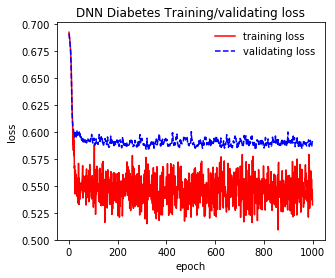

In [13]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('DNN Diabetes loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Diabetes Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


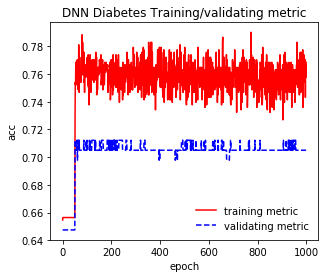

In [14]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Diabetes metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Diabetes Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
